# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:** ###

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:** ###

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(-0.5, 419.5, 279.5, -0.5)

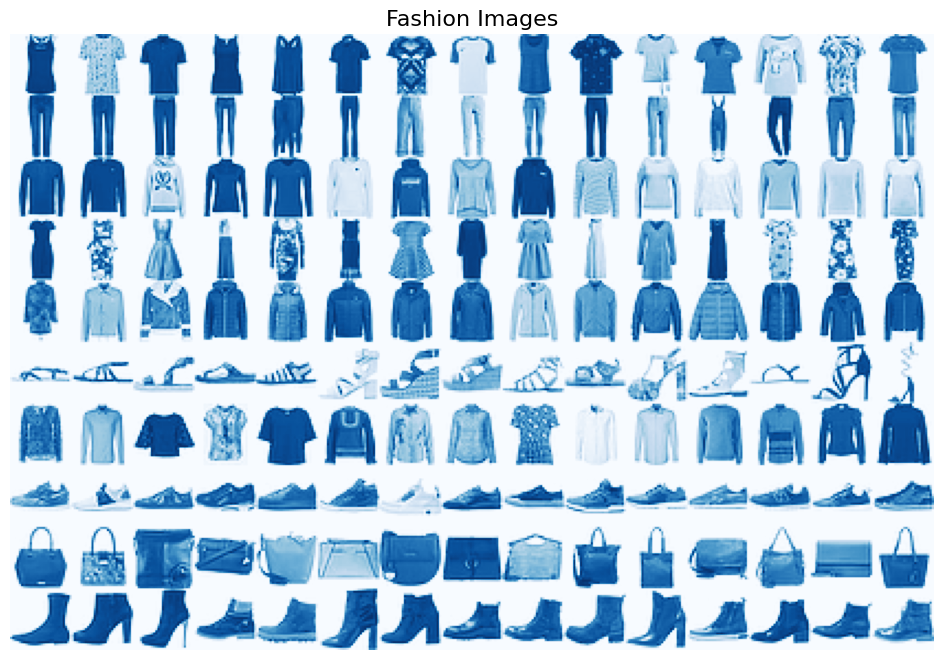

In [ ]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [ ]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 52
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify = y)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

max_iter=2000
tol=0.001

lg = LogisticRegression(random_state=random_state, max_iter=max_iter, tol=0.001).fit(X_tr, y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lg.predict(X_test)
y_pred

array([8, 3, 0, ..., 4, 1, 9], dtype=uint8)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

f_1_score = f1_score(y_test, y_pred, average='weighted')
f_1_score

0.7578783253362549

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       200
           1       0.89      0.94      0.91       200
           2       0.60      0.56      0.58       200
           3       0.77      0.74      0.76       200
           4       0.60      0.66      0.63       200
           5       0.88      0.84      0.86       200
           6       0.46      0.44      0.45       200
           7       0.89      0.84      0.87       200
           8       0.92      0.89      0.91       200
           9       0.86      0.92      0.89       200

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** Метрика F1-score используется для оценки качества модели классификации. Она представляет собой гармоническое среднее между precision (точностью) и recall (полнотой). Таким образом данная метрица показаывает баланс между точностью и полнотой. Данная метрица полезна особенно когда данные несбалансированы

Точность отвечает на вопрос, сколько из тех обьектов , которые модель посчитала правильными, на самом деле правильные (показывает насколько хорошо модель избегает ошибок) То есть показывает какая доля предсказаний положительного класса оказалась правильной

Полнота показывает какую долю обьектов положительного класса модель смогла правильно предсказать


Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

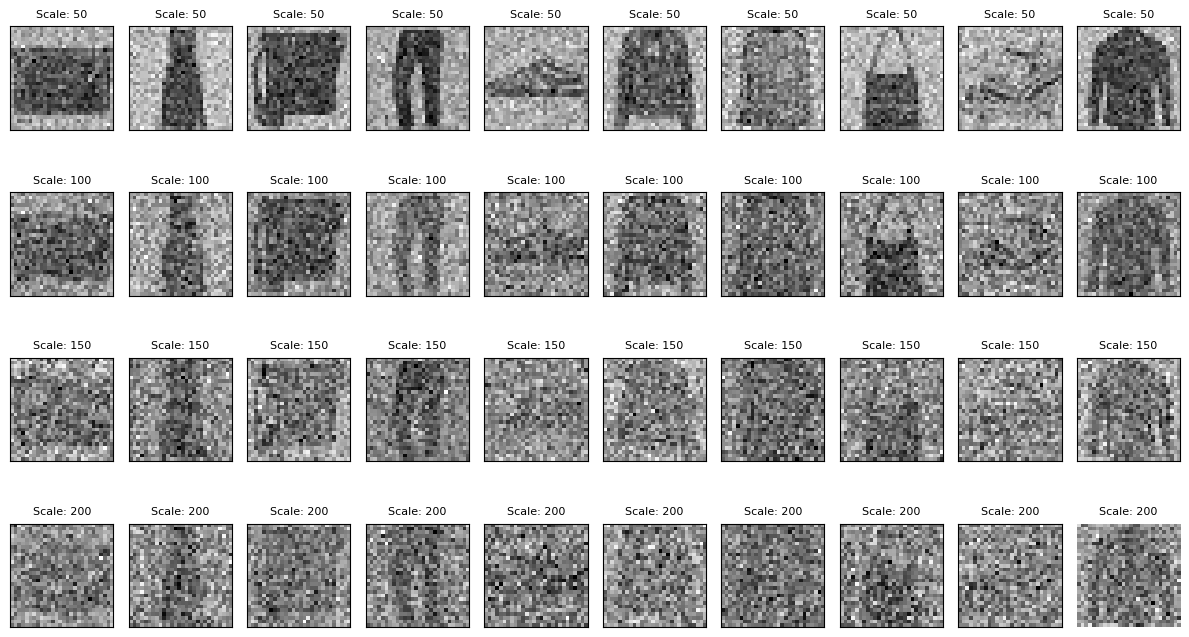

In [ ]:
scales = [50,100,150,200]
noisy_data ={}

fig, axes = plt.subplots(4, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

noisy_data ={}
for row, scale in enumerate(scales):
    for i in range(10):
        X_test_noisy = np.random.normal(X_test, scale)
        noisy_data[scale] = X_test_noisy
        ax = axes[row, i]
        ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
        ax.set_title(f'Scale: {scale}', fontsize=8)
        plt.axis('off')


plt.tight_layout()
plt.show()

**Ваши выводы:** ###

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
for i in range(len(scales)):
    y_pred_noise = lg.predict(noisy_data[scales[i]])
    score = f1_score(y_test, y_pred_noise, average='weighted')
    print(f'Scale = {scales[i]}, f1 score {score}')
    print(classification_report(y_test, y_pred_noise))
    print('-----------------------------------------------')


Scale = 50, f1 score 0.5468981963159448
              precision    recall  f1-score   support

           0       0.42      0.41      0.42       200
           1       0.84      0.67      0.75       200
           2       0.27      0.28      0.28       200
           3       0.42      0.42      0.42       200
           4       0.29      0.35      0.32       200
           5       0.71      0.68      0.70       200
           6       0.23      0.33      0.27       200
           7       0.83      0.68      0.75       200
           8       0.83      0.70      0.76       200
           9       0.81      0.81      0.81       200

    accuracy                           0.53      2000
   macro avg       0.57      0.53      0.55      2000
weighted avg       0.57      0.53      0.55      2000

-----------------------------------------------
Scale = 100, f1 score 0.38629993833246945
              precision    recall  f1-score   support

           0       0.24      0.29      0.26       200
  

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

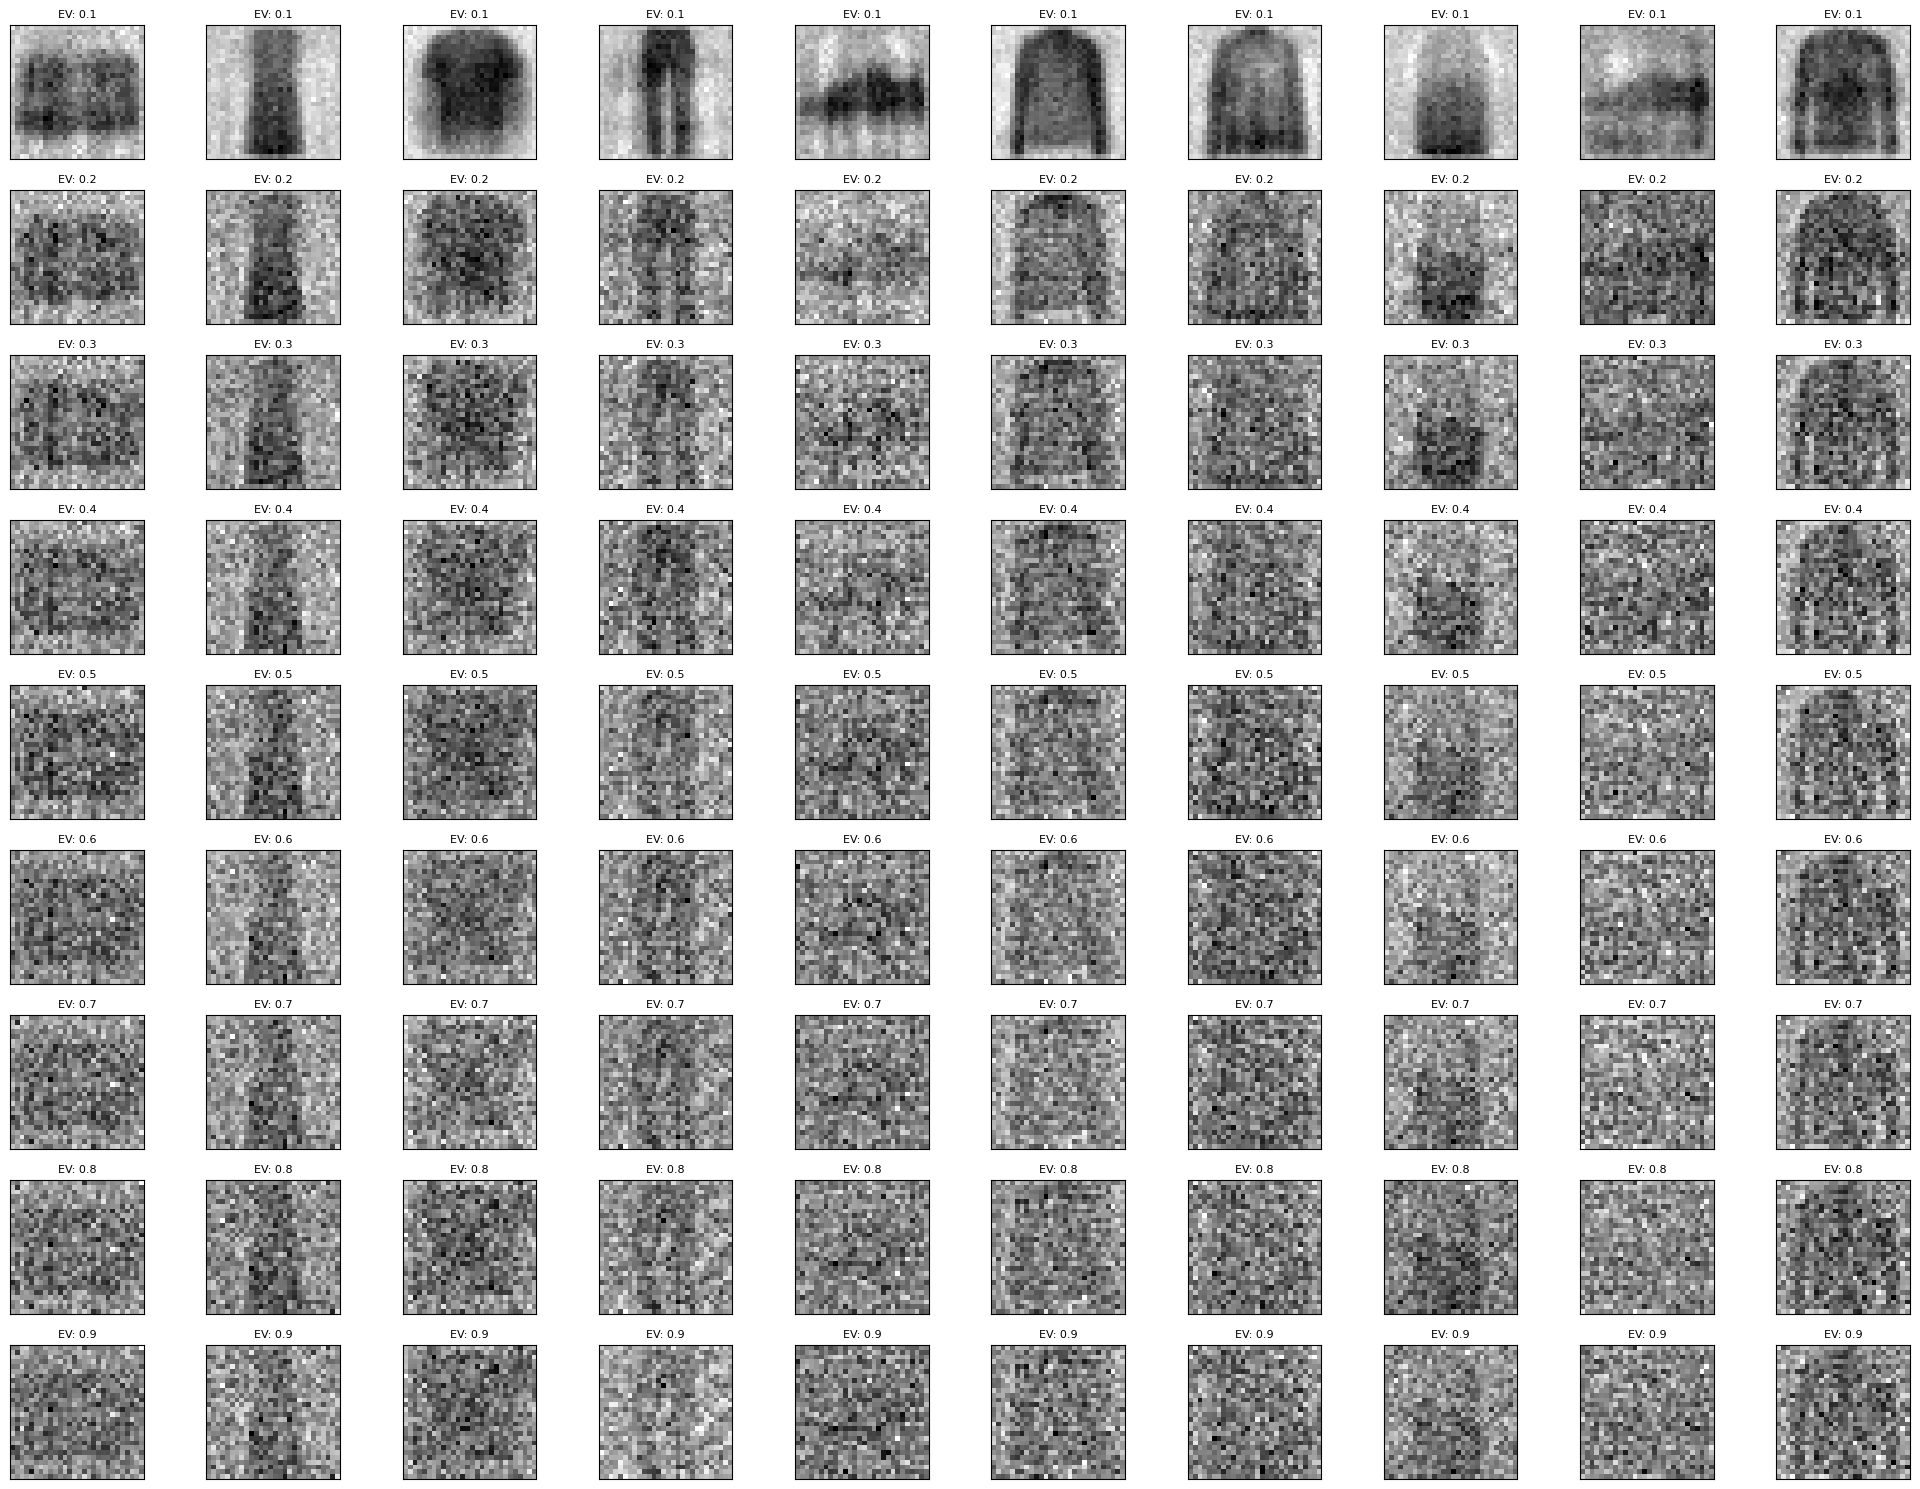

In [ ]:
from sklearn.decomposition import PCA

explained_variances = np.arange(0.1, 1.0, 0.1)


fig, axes = plt.subplots(len(explained_variances), 10, figsize=(20, 15), subplot_kw={'xticks': [], 'yticks': []})

for var_idx, explained_variance in enumerate(explained_variances):
    pca = PCA(n_components=explained_variance, random_state=42)
    X_test_reduced = pca.fit_transform(X_test_noisy)
    X_test_restored = pca.inverse_transform(X_test_reduced)

    n_components = pca.n_components_


    for i, ax in enumerate(axes[var_idx]):
        ax.imshow(X_test_restored[i].reshape(28, 28), cmap=plt.cm.gray_r)
        ax.set_title(f'EV: {explained_variance:.1f}', fontsize=8)

plt.tight_layout()
plt.show()

**Ваши выводы:** ###

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
f1_scores = []

for ev in explained_variances:
    pca = PCA(n_components=ev, random_state=42)
    X_test_reduced = pca.fit_transform(X_test_noisy)
    X_test_restored = pca.inverse_transform(X_test_reduced)
    y_pred = lg.predict(X_test_restored)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

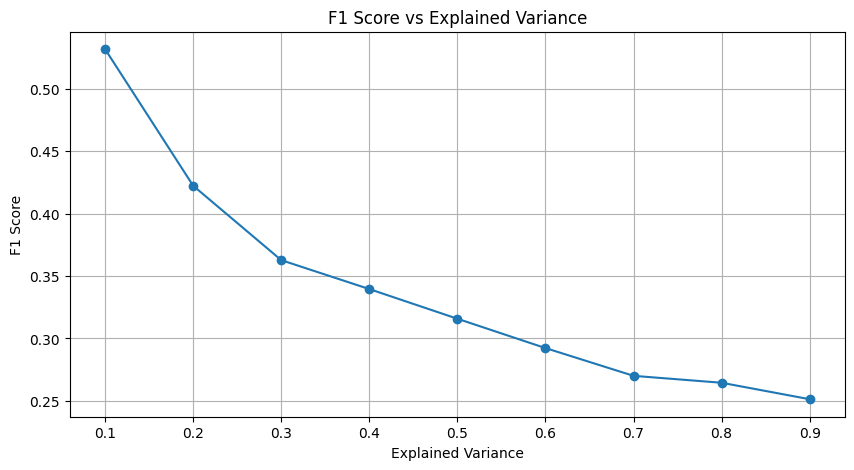

EV:0.1, F1 Score:0.5316871070985182
EV:0.2, F1 Score:0.42229123596460166
EV:0.30000000000000004, F1 Score:0.36271683075525707
EV:0.4, F1 Score:0.3395535883692844
EV:0.5, F1 Score:0.31578042611424534
EV:0.6, F1 Score:0.292285327053698
EV:0.7000000000000001, F1 Score:0.2700509777173344
EV:0.8, F1 Score:0.2645044919713974
EV:0.9, F1 Score:0.2513147459179591


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(explained_variances, f1_scores, marker='o')
plt.title('F1 Score vs Explained Variance')
plt.xlabel('Explained Variance')
plt.ylabel('F1 Score')
plt.xticks(explained_variances)
plt.grid()
plt.show()


for ev, score in zip(explained_variances, f1_scores):
    print(f'EV:{ev}, F1 Score:{score}')

**Ваши выводы:** ###

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:** ###

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import pairwise_distances
import time
from scipy.spatial import distance
from scipy.spatial.distance import squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

0          1          2          3          4          5  \
0  10.382991 -14.438544 -23.950798 -17.809813   2.480495 -15.743114   
1  18.987842 -13.071734  15.619164 -11.288528 -11.624820  14.845464   
2   7.426000  -9.236580 -21.139348   6.732592   0.447684 -20.687020   
3  10.718844 -10.240587 -20.604991   4.828083  -0.073568 -23.747055   
4  10.662165   3.871777  12.384108  -1.921321  -1.990254  -5.469310   

           6          7          8          9  
0  -9.112421 -27.390035 -11.955001  18.069910  
1  -4.924935  21.207876 -23.703025   4.440474  
2 -18.545136   7.758288  18.620790  -3.006755  
3 -17.260869   7.074364  16.996747  -6.796469  
4   2.801321 -19.978717  23.414766  -2.654889

In [ ]:
data = np.array(data)

**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
class TSNE:
    def __init__(self, perplexity=30.0, n_iter=1000, method="tsne"):
        """
        реализации tsne и sne

        Параметры:
            perplexity - указ количеств соседей которые используются для расчета условных вероятнсотей сходств
            method- Метод для работы — "tsne" или "sne".
        """
        self.perplexity = perplexity
        self.n_iter = n_iter
        self.method = method

        if self.method not in ["tsne", "sne"]:
            raise ValueError("method должен быть 'tsne' или 'sne'")

    def compute_high_dim_probabilities(self, X):
        """
        расчет услвоной вероятности в исходном пространстве чтоб определять насколько точки близки друг к другу

        Отражает что точки i и j являются соедами в исходном пространтве чем меньше расстояние тем выше верояность
        """

        #вычисляем расстояния между точками
        n_samples = X.shape[0]
        distances = np.square(X[:, np.newaxis] - X).sum(axis=2)
        #значения на диагонали заполняю беск тчобы не учитывать расстояние точки до самой себя
        np.fill_diagonal(distances, np.inf)

        P = np.zeros((n_samples, n_samples))

        #стремимся к данному значению perplexity которая задает число ближащих соседей которые должны быть значимыми для точки
        target_entropy = np.log(self.perplexity)

        for i in range(n_samples):
            sigma = 1.0
            beta_min, beta_max = -np.inf, np.inf
            tolerance = 1e-5

            for _ in range(50):
                p_ji = np.exp(-distances[i] * sigma)
                p_ji /= p_ji.sum()
                #измеряет степерь неопределенности
                entropy = -np.sum(p_ji * np.log(p_ji + 1e-12))

                if np.abs(entropy - target_entropy) < tolerance:
                    break

                #регуляровка сигмы методом бинарного поиска
                #для каждой точки если энтропия больше целевой то сигма слишком мала и вероятности pij слишком размыты

                #если энтропия меньше целевой то сигма слишком велика и вероятности концентрированы
                if entropy > target_entropy:
                    beta_min = sigma
                    sigma = sigma * 2 if beta_max == np.inf else (sigma + beta_max) / 2
                else:
                    beta_max = sigma
                    sigma = sigma / 2 if beta_min == -np.inf else (sigma + beta_min) / 2

            #преобразование расстояний в вероятности с использованием гауссиана
            #точки находящиеся далеко имеют меньшую вероятность
            #сигма  ширина гауссиана для  точки i которая
            #регулируется для каждой точки чтобы достичь заданной перплексии
            #большая сигма означает что p распределяются более равномерно (размытие вероятностей)
            #малая сигма означает что p концентрируется на ближ точках
            P[i] = np.exp(-distances[i] * sigma)
            P[i] /= P[i].sum()

        P = (P + P.T) / (2 * n_samples)
        return P

    def compute_low_dim_probabilities(self, Y):
        """
        вычисляет вероятности Q в низкоразмерном пространстве
        зависит от выбранного метода: tsne или sne


        Гауссово распределение:

        Если использовать гауссово распределение, удаленные точки будут практически "игнорироваться" что
         приведет к сжатию всех кластеров, что искажает глобальную структуру

        t-распределение:

        Позволяет учитывать удаленные точки, предоставляя им незначительную, но ненулевую вероятность
        Это помогает сохранить и локальную, и глобальную структуру, предотвращая чрезмерное сжатие кластеров

        """
        #считаю расстояние между точками
        distances = np.square(Y[:, np.newaxis] - Y).sum(axis=2)
        if self.method == "tsne":
            # tsne - юзаю распределение стьюдента
            #используется t-распр с с одной степенью свободы
            #так как решает проблему гауссова расрпделения (при больших расстояний вер-ть становится практически 0)
            #что приводит к тому что удаленные точки оказываются слишком близко друг к другув низкоразмерном пространстве
            #тогда как t -распределенеи уменьшается медленнее с увеличением разницы из за тяжелых хвостов
            #поэтому удаленные точки получают заметное q что помогает их правильно расположить в низкоразмерном пространстве
            numerator = (1 + distances) ** -1
        elif self.method == "sne":
            # sne использую гауссово распределение
            numerator = np.exp(-distances)

        #
        np.fill_diagonal(numerator, 0)  # Убираем влияние самих себя
        Q = numerator / numerator.sum()
        return Q

    def kl_divergence(self, Y, P, n_samples):
        """
        минимизация расхождения p и q

        Используется дивергенция Кульбака-Лейблера для оценки расхождения между распределениями
        P и Q
        """
        #если p близко к q  логарифм стремится к 0  т есть распредленяи идеально совпадают
        #если q сильно отличается от p вклад в дивергенцию увеличивается

        #умножая на p слагаемое делает вклад в kl значимым только для тех пар где p сликшом велико

        #ЕСЛИ P велико а q мало возникает большой штраф т к нарушает локальную струтктуру данных и t-SNE пытается это исправить
        #если p мало  то штраф небольшой  так как удаленные точки не имеют большого влияния
        Y = Y.reshape(n_samples, -1)
        Q = self.compute_low_dim_probabilities(Y)
        epsilon = 1e-12 # для предотвращения деления на ноль и логарифма от нуля
        P = np.maximum(P, epsilon)
        Q = np.maximum(Q, epsilon)

        #КОГДА p велико но q   мало: штраф большой, так как важная связь потеряна
        #КОГДА p велико но q   велико: штраф минимален, так как структура данных сохранена
        return np.sum(P * np.log(P / Q))


    def fit_transform(self, X, n_components=2):
        """
        Выполняет t-SNE или SNE с использованием готового оптимизатора.
        """
        start_time = time.time()

        n_samples = X.shape[0]
        Y_init = np.random.randn(n_samples, n_components)  # Инициализация точек
        P = self.compute_high_dim_probabilities(X)  # Вычисляем вероятности P

        # Оптимизация с использованием minimize
        result = minimize(
            fun=self.kl_divergence,
            x0=Y_init.flatten(),
            args=(P, n_samples),
            method='L-BFGS-B',
            options={'maxiter': self.n_iter, 'disp': True}
        )

        # Преобразуем результат в матрицу (n_samples, n_components)
        Y_optimized = result.x.reshape(n_samples, n_components)
        finished_time = time.time()

        print(f"Время работы алгоритма при значении перплексии {self.perplexity}:{finished_time-start_time}")
        return Y_optimized

In [ ]:
tsne_15 = TSNE(perplexity=15, n_iter=500, method="tsne")
tsne_30 = TSNE(perplexity=30, n_iter=500, method="tsne")
tsne_45 = TSNE(perplexity=45, n_iter=500, method="tsne")

sne_15 = TSNE(perplexity=15, n_iter=500, method="sne")
sne_30 = TSNE(perplexity=30, n_iter=500, method="sne")
sne_45 = TSNE(perplexity=45, n_iter=500, method="sne")

new_X_15 = tsne_15.fit_transform(data)
new_X_30 = tsne_30.fit_transform(data)
new_X_45 = tsne_45.fit_transform(data)

new_X_15_sne = sne_15.fit_transform(data)
new_X_30_sne = sne_30.fit_transform(data)
new_X_45_sne = sne_45.fit_transform(data)

Время работы алгоритма при значении перплексии 15:77.33407998085022
Время работы алгоритма при значении перплексии 30:27.865955352783203
Время работы алгоритма при значении перплексии 45:25.174617767333984
Время работы алгоритма при значении перплексии 15:18.51217293739319
Время работы алгоритма при значении перплексии 30:16.842768669128418
Время работы алгоритма при значении перплексии 45:17.832594871520996


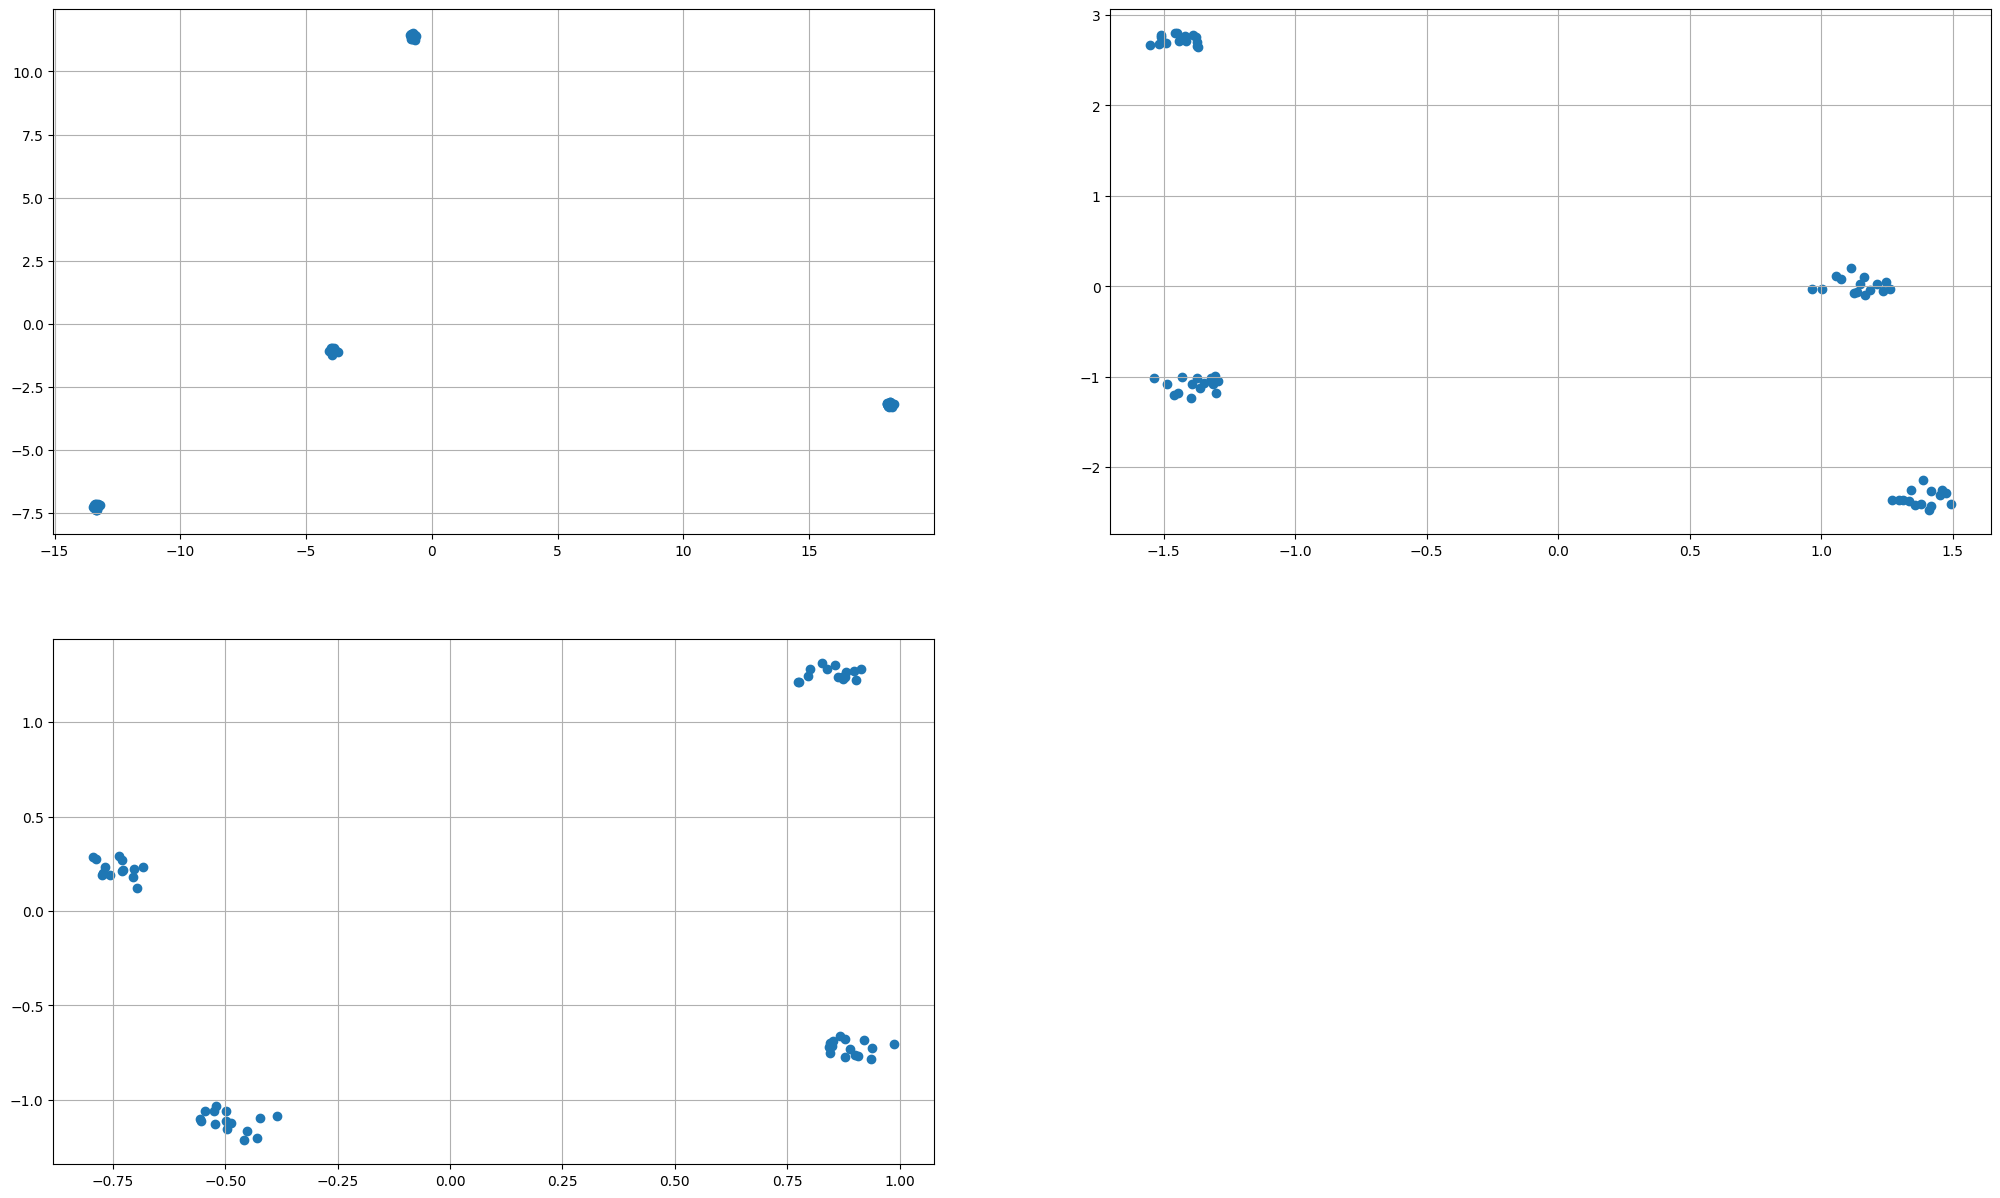

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(2, 2, 1)
plt.scatter(new_X_15[:, 0], new_X_15[:, 1])
plt.grid()

plt.subplot(2, 2, 2)
plt.scatter(new_X_30[:, 0], new_X_30[:, 1])
plt.grid()

plt.subplot(2, 2, 3)
plt.scatter(new_X_45[:, 0], new_X_45[:, 1])
plt.grid()

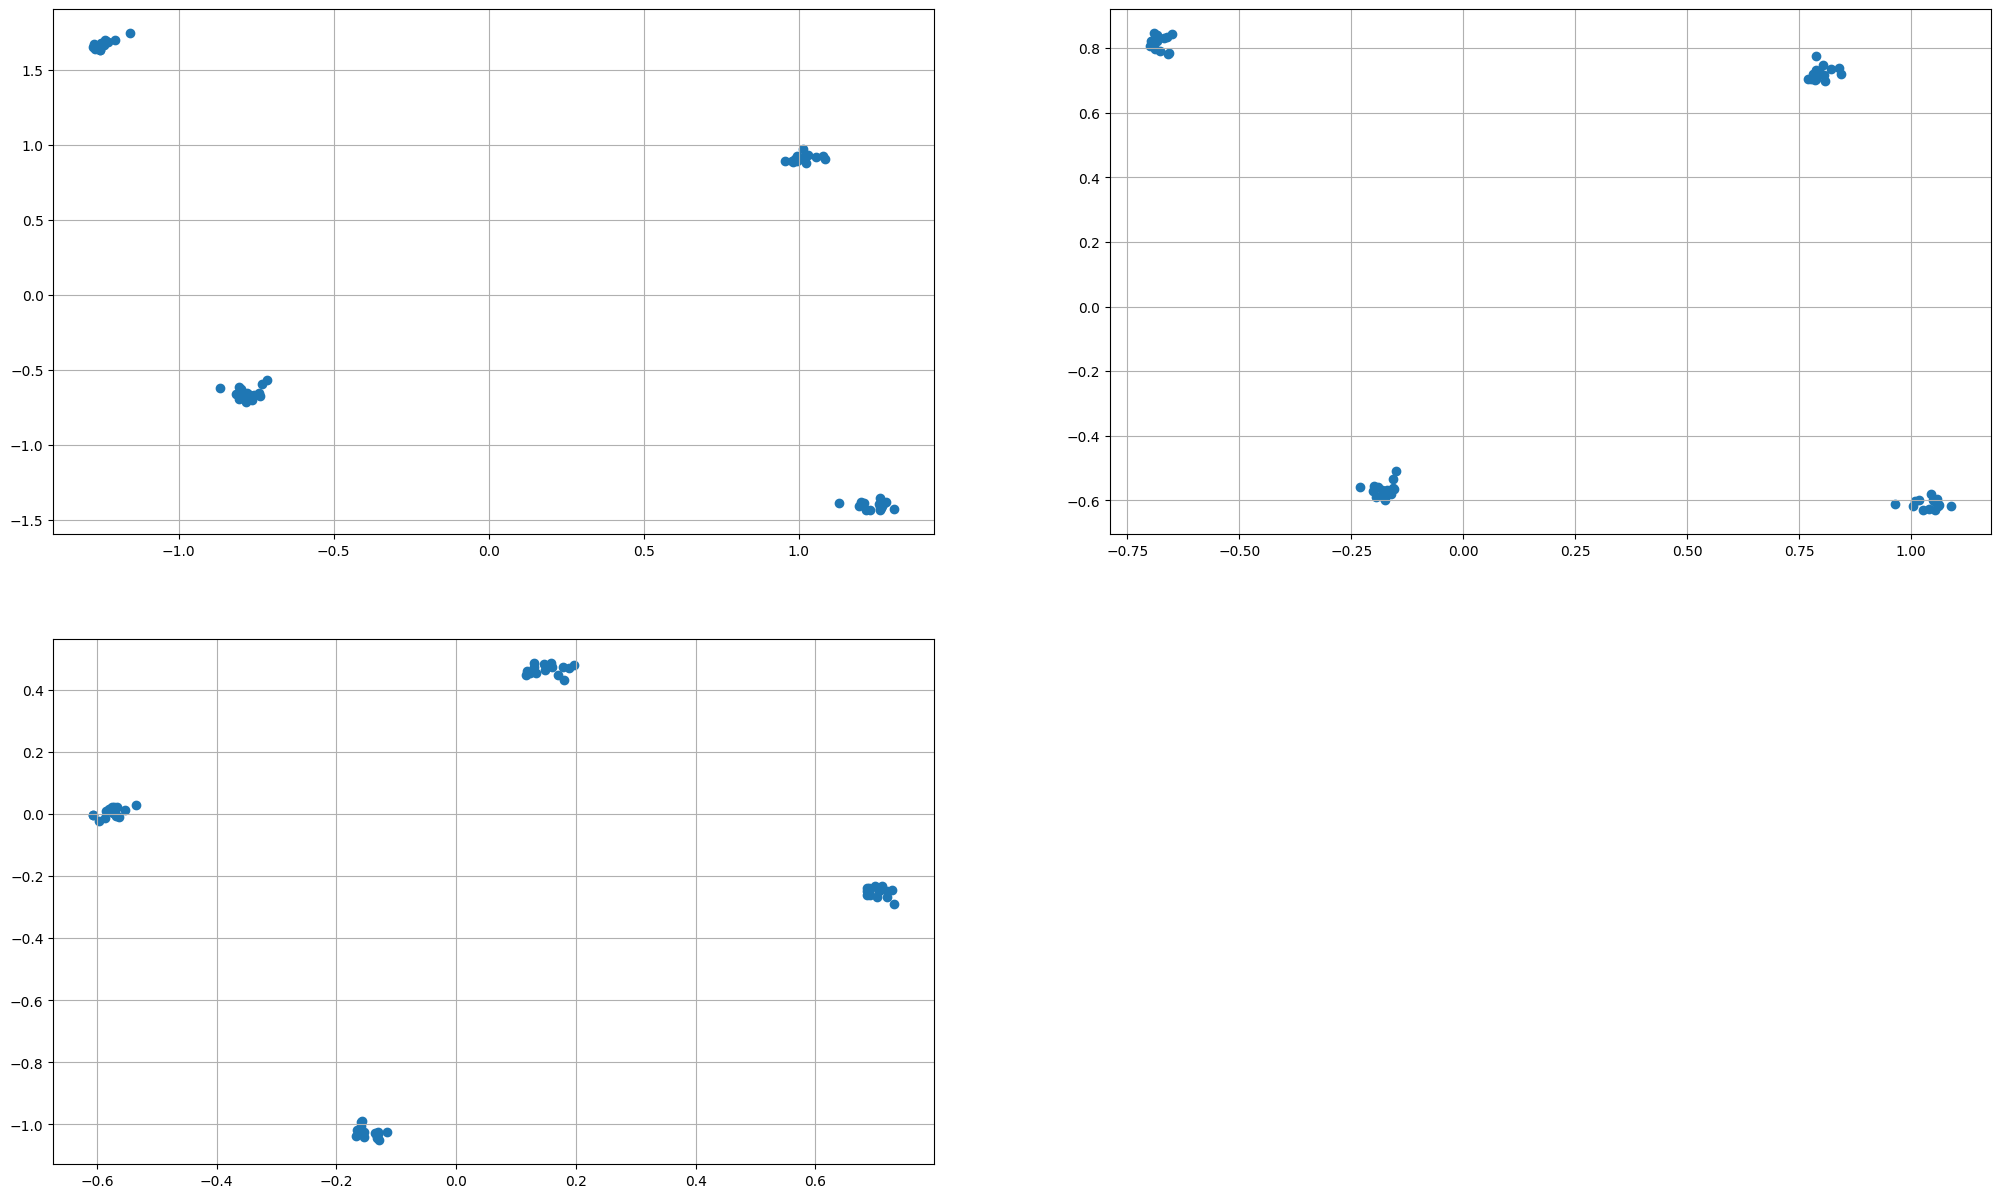

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(2, 2, 1)
plt.scatter(new_X_15_sne[:, 0], new_X_15_sne[:, 1])
plt.grid()

plt.subplot(2, 2, 2)
plt.scatter(new_X_30_sne[:, 0], new_X_30_sne[:, 1])
plt.grid()

plt.subplot(2, 2, 3)
plt.scatter(new_X_45_sne[:, 0], new_X_45_sne[:, 1])
plt.grid()

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.optimize import minimize
from tqdm import tqdm
import warnings
from sklearn.manifold import TSNE
import pandas as pd
from numpy import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import time
from sklearn.decomposition import PCA

In [ ]:
link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'

# Загрузка данных
X = pd.read_csv(link, header=None)
X.shape

(60, 10)

### perplexity

  0%|          | 0/3 [00:00<?, ?it/s]

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.001s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 25.435205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.233181
[t-SNE] KL divergence after 1000 iterations: 0.001333
--------------------------
       tsne1      tsne2
0  -4.230919  12.374857
1 -11.477006 -15.365409
2   8.148315   6.720089
3   8.008764   6.786709
4   3.531254  -3.852917
--------------------------


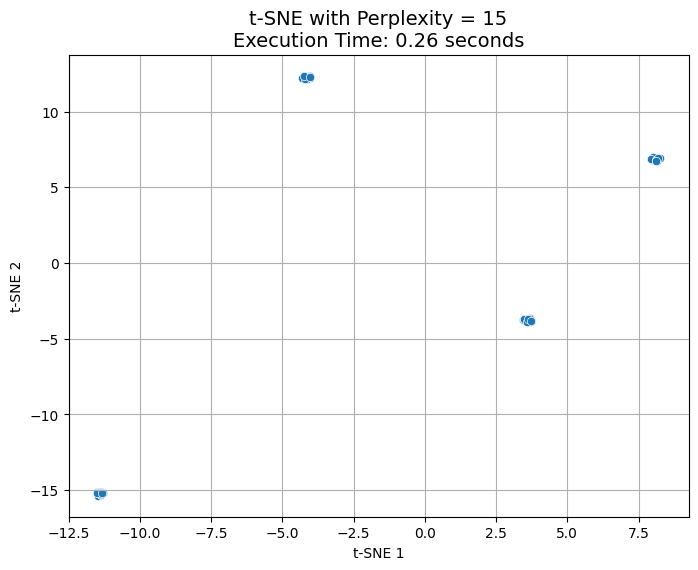

 33%|███▎      | 1/3 [00:00<00:00,  2.03it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.001s...
[t-SNE] Computed neighbors for 60 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.317284
[t-SNE] KL divergence after 800 iterations: 0.008426
--------------------------
      tsne1     tsne2
0  0.231027 -0.031839
1 -2.312907 -2.991436
2  1.555378 -2.597023
3  1.509968 -2.574738
4  3.218551 -0.916622
--------------------------


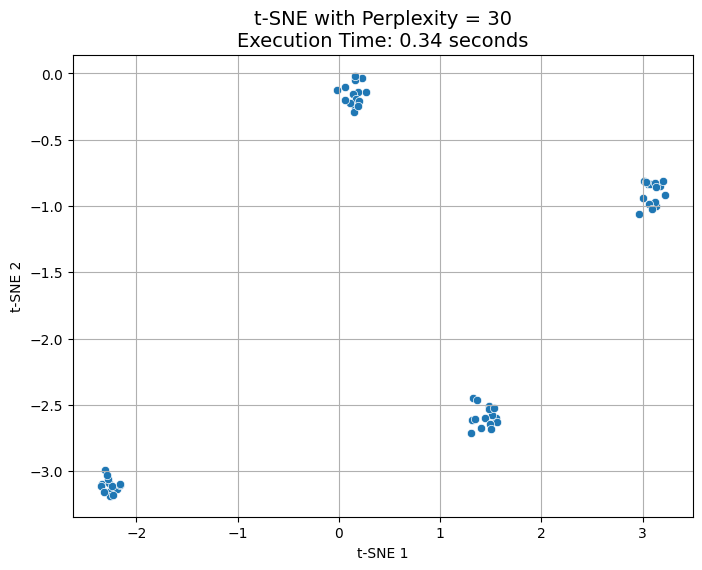

 67%|██████▋   | 2/3 [00:01<00:00,  1.60it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.001s...
[t-SNE] Computed neighbors for 60 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 52.523937
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.173874
[t-SNE] KL divergence after 950 iterations: 0.013591
--------------------------
      tsne1     tsne2
0  0.802364 -1.051430
1 -0.421229  0.513634
2 -0.860144 -1.424298
3 -0.847525 -1.403345
4 -0.017243 -2.449898
--------------------------


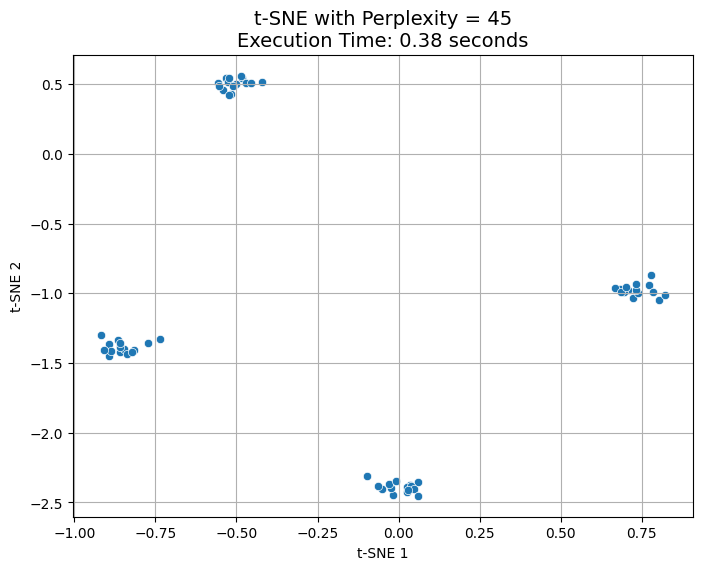

100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


In [ ]:
perp_list = [15, 30, 45]
for perp in tqdm(perp_list):
  start_time = time.time()
  tsne = TSNE( n_components=2,
    perplexity=perp,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True)
  X_tsne = tsne.fit_transform(X)
  X_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
  elapsed_time = time.time() - start_time
  print('--------------------------')
  print(X_tsne.head())
  print('--------------------------')
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='tsne1', y='tsne2', data=X_tsne)
  plt.title(f't-SNE with Perplexity = {perp}\nExecution Time: {elapsed_time:.2f} seconds', fontsize=14)
  plt.xlabel('t-SNE 1')
  plt.ylabel('t-SNE 2')
  plt.grid(True)
  plt.show()

С увеличением перплексии целевая энтропия возрастает  ( гауссиан для каждой точки становится шире, так как больше соседей должны получать значимые вероятности и таким образом веротяность становится боеле равномерным ( больше точек вносит вклад в вероятность и локальные свяи теряют относительную важность

То есть локальная структура размывается т к учиытвает больше соседей а глобальная структура становится более выраженной так как отдельные точки начинают иметь заметные вероятности

# early_exaggeration

данный параметр временно увеличивает вероятности P в начале оптимизации чтобы усилить разделение кластеров на ранних этапах  (Помогает точкам в низкоразмерном пространстве быстрее разойтись и найти грубую глобальную структуру)

  0%|          | 0/5 [00:00<?, ?it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.002359
[t-SNE] KL divergence after 1000 iterations: 0.002360
--------------------------
      tsne1     tsne2
0 -0.615442 -1.609826
1  2.738364  0.341259
2 -2.411160  0.390891
3 -2.395370  0.353477
4 -0.573966  1.942601
--------------------------


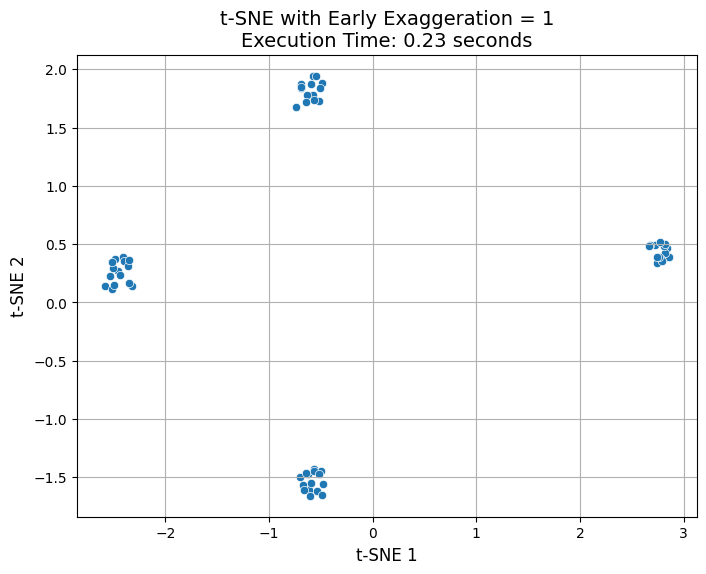

 20%|██        | 1/5 [00:00<00:01,  2.04it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.066196
[t-SNE] KL divergence after 700 iterations: 0.006532
--------------------------
      tsne1     tsne2
0  2.532446 -2.169436
1 -3.424269 -0.869215
2 -0.121886 -2.727015
3 -0.101032 -2.740403
4  0.053130 -0.211115
--------------------------


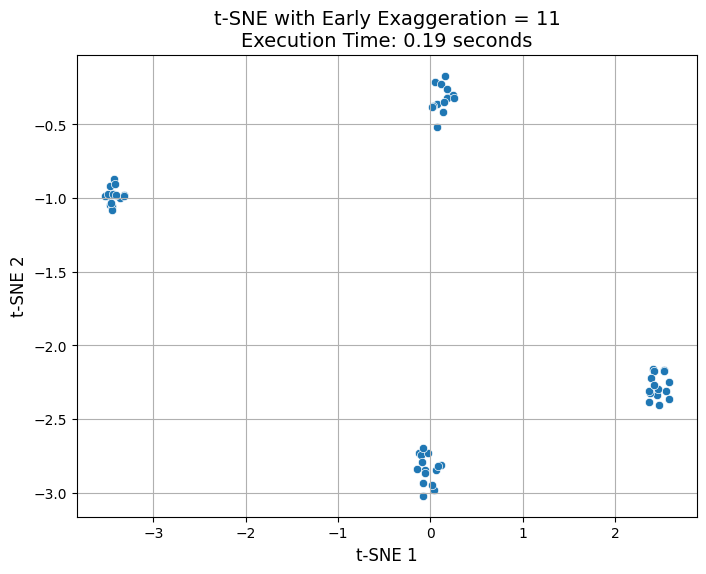

 40%|████      | 2/5 [00:00<00:01,  2.23it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.001s...
[t-SNE] Computed neighbors for 60 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.968384
[t-SNE] KL divergence after 750 iterations: 0.002345
--------------------------
      tsne1     tsne2
0  3.163114 -0.125615
1  6.443617  1.936038
2  1.294012  1.808727
3  1.310991  1.772474
4  3.079733  3.417806
--------------------------


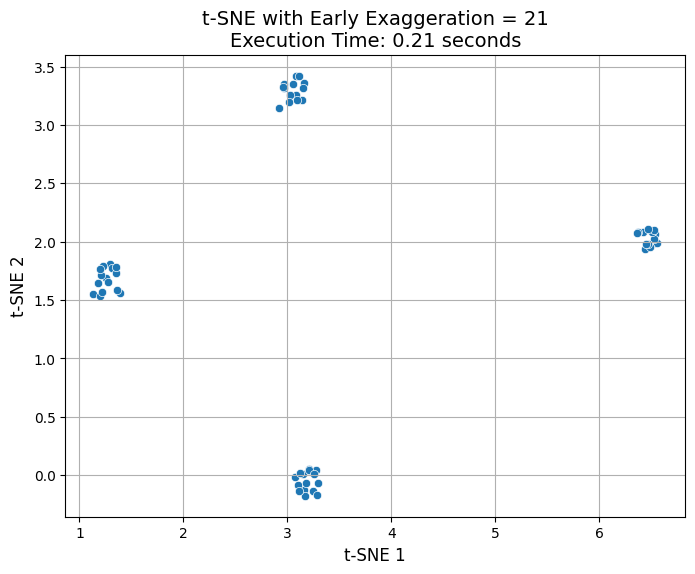

 60%|██████    | 3/5 [00:01<00:00,  2.08it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 152.203430
[t-SNE] KL divergence after 950 iterations: 0.006615
--------------------------
      tsne1     tsne2
0  2.890497 -2.436611
1 -2.399278  0.594948
2  0.190000 -2.172606
3  0.205699 -2.191680
4  1.115648  0.177817
--------------------------


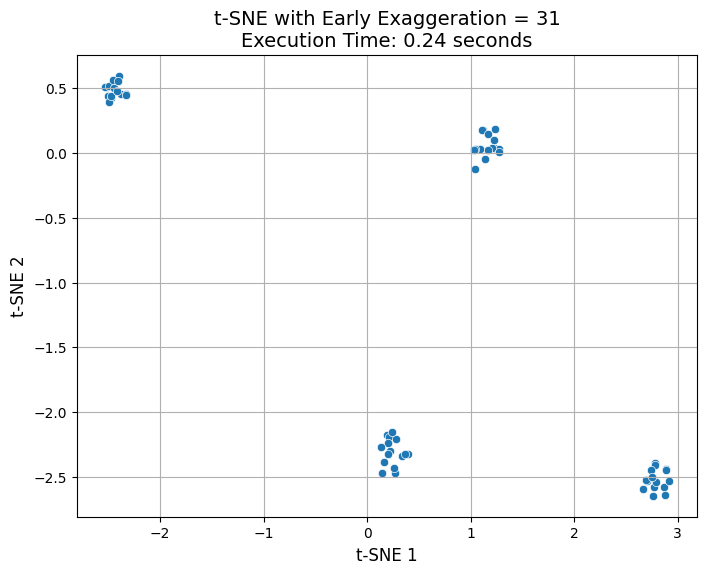

 80%|████████  | 4/5 [00:01<00:00,  2.09it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.001s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 218.615707
[t-SNE] KL divergence after 750 iterations: 0.002317
--------------------------
      tsne1     tsne2
0  1.383639  0.553013
1  4.249493 -2.067090
2 -0.790827 -1.026921
3 -0.767463 -0.994113
4  0.672450 -2.929697
--------------------------


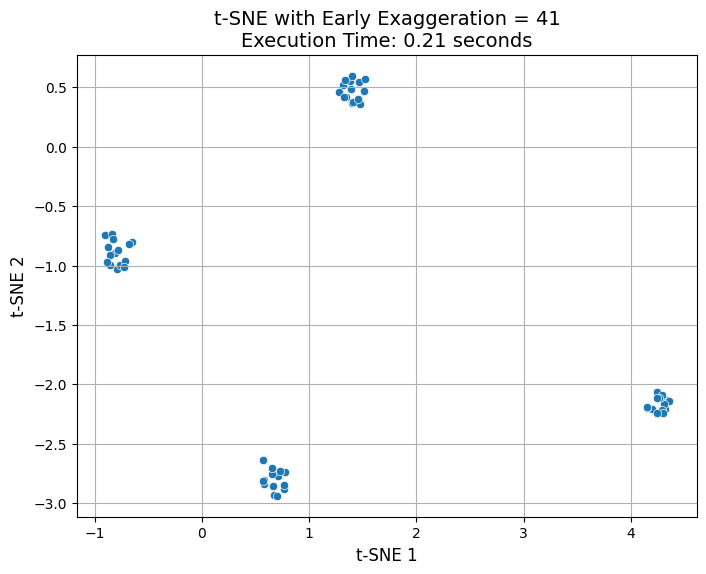

100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


In [ ]:
for early_exag in tqdm(range(1, 51, 10)):  # Пример значений от 5 до 20
    start_time = time.time()  # Начало отсчета времени

    tsne = TSNE(
        n_components=2,
        perplexity=30,  # Фиксированное значение perplexity
        early_exaggeration=early_exag,  # Варьируем early_exaggeration
        metric="euclidean",
        n_jobs=-1,  # Используйте -1 для всех доступных ядер
        random_state=42,
        verbose=1  # Для подробного вывода
    )

    # Применение t-SNE
    X_tsne = tsne.fit_transform(X)

    # Преобразуем результат в DataFrame
    X_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])

    elapsed_time = time.time() - start_time  # Время выполнения

    print('--------------------------')
    print(X_tsne.head())
    print('--------------------------')

    # Визуализация результатов
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='tsne1', y='tsne2', data=X_tsne)
    plt.title(f't-SNE with Early Exaggeration = {early_exag}\nExecution Time: {elapsed_time:.2f} seconds', fontsize=14)
    plt.xlabel('t-SNE 1', fontsize=12)
    plt.ylabel('t-SNE 2', fontsize=12)
    plt.grid(True)
    plt.show()

# exaggeration

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508


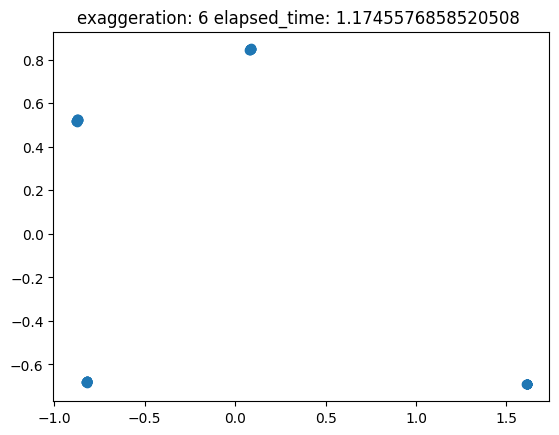

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508
T-sne – exaggeration: 8 – elapsed_time: 2.5511436462402344


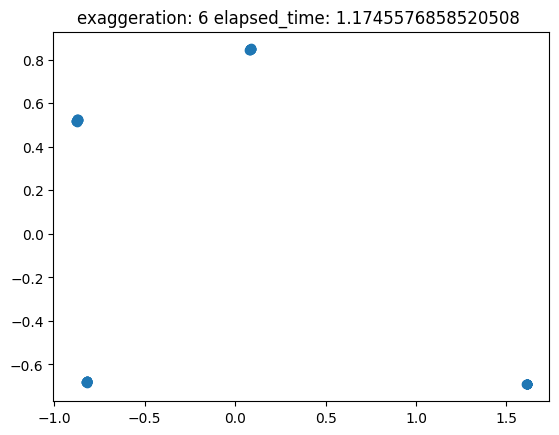

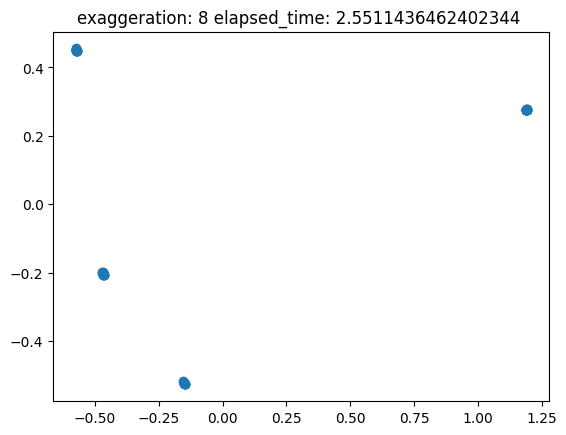

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508
T-sne – exaggeration: 8 – elapsed_time: 2.5511436462402344
T-sne – exaggeration: 10 – elapsed_time: 0.7090425491333008


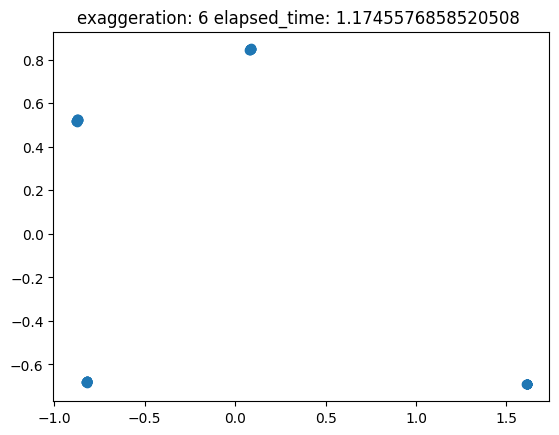

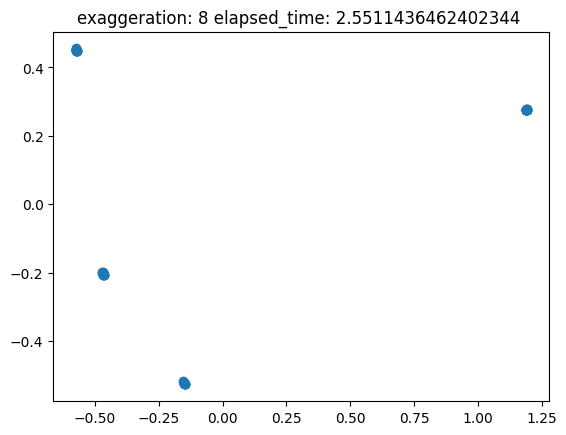

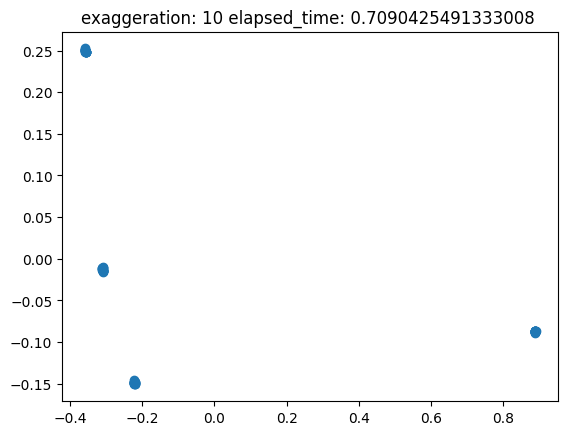

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508
T-sne – exaggeration: 8 – elapsed_time: 2.5511436462402344
T-sne – exaggeration: 10 – elapsed_time: 0.7090425491333008
T-sne – exaggeration: 12 – elapsed_time: 0.6730480194091797


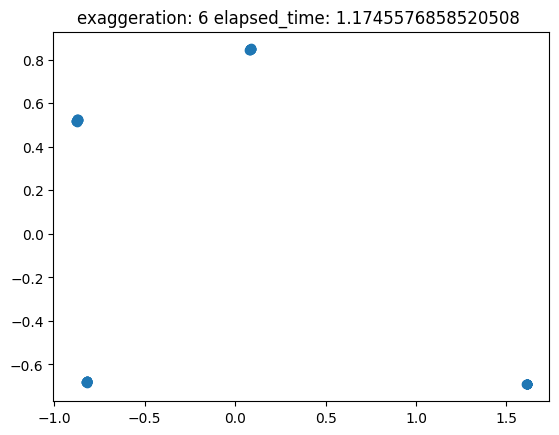

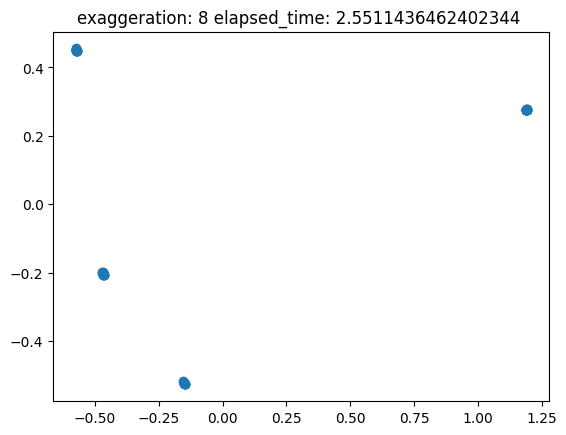

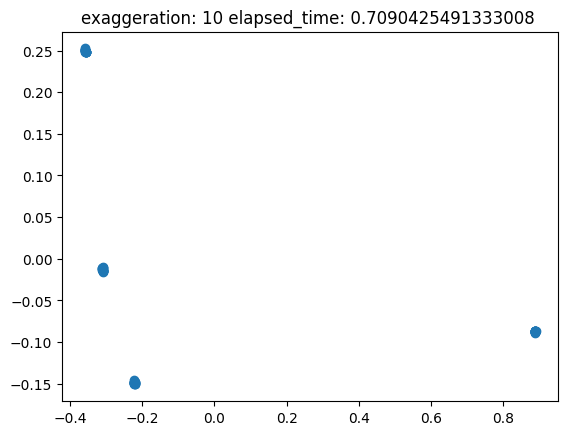

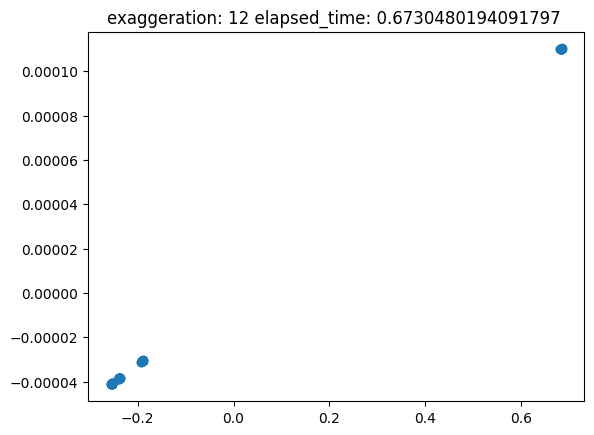

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508
T-sne – exaggeration: 8 – elapsed_time: 2.5511436462402344
T-sne – exaggeration: 10 – elapsed_time: 0.7090425491333008
T-sne – exaggeration: 12 – elapsed_time: 0.6730480194091797
T-sne – exaggeration: 14 – elapsed_time: 0.6775393486022949


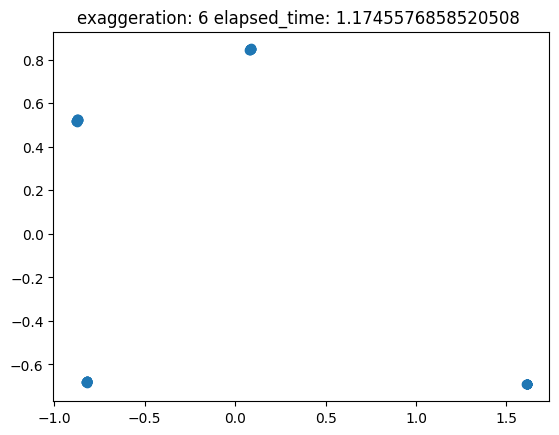

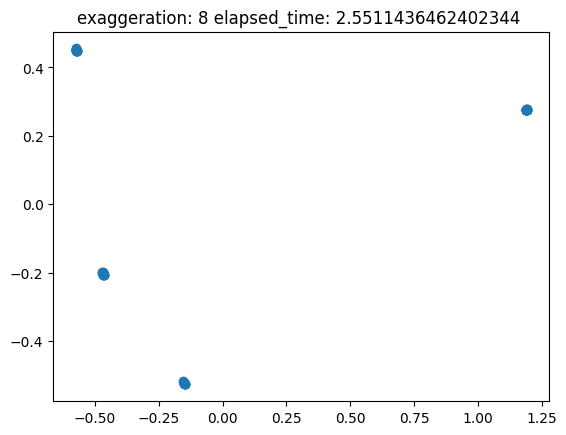

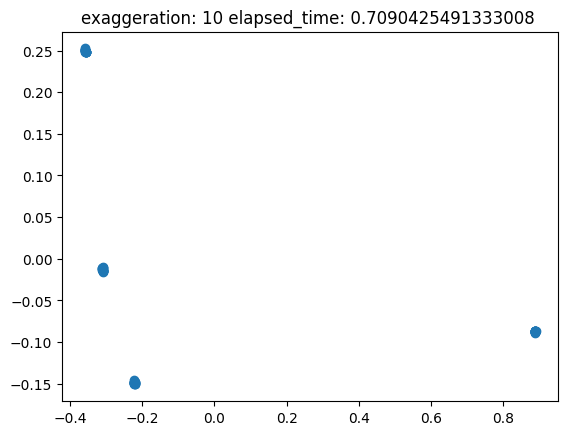

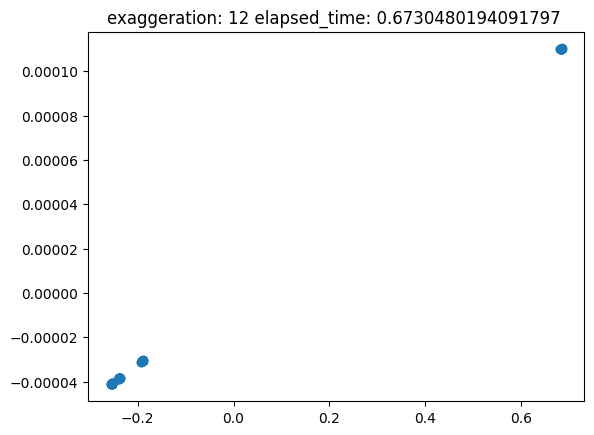

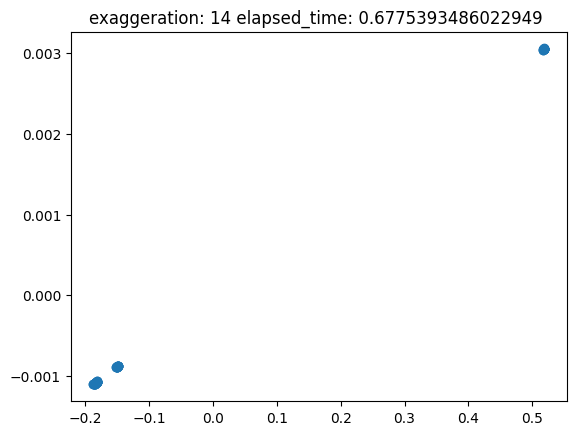

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508
T-sne – exaggeration: 8 – elapsed_time: 2.5511436462402344
T-sne – exaggeration: 10 – elapsed_time: 0.7090425491333008
T-sne – exaggeration: 12 – elapsed_time: 0.6730480194091797
T-sne – exaggeration: 14 – elapsed_time: 0.6775393486022949
T-sne – exaggeration: 16 – elapsed_time: 0.6751217842102051


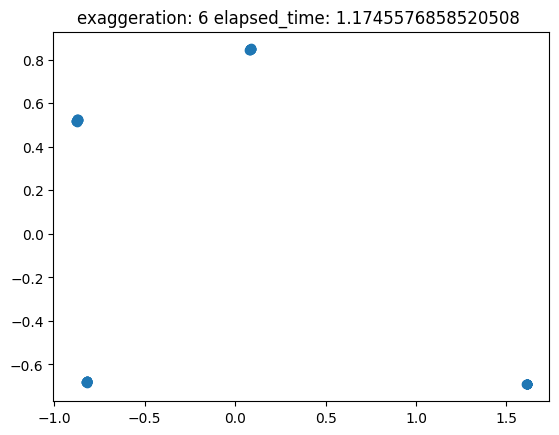

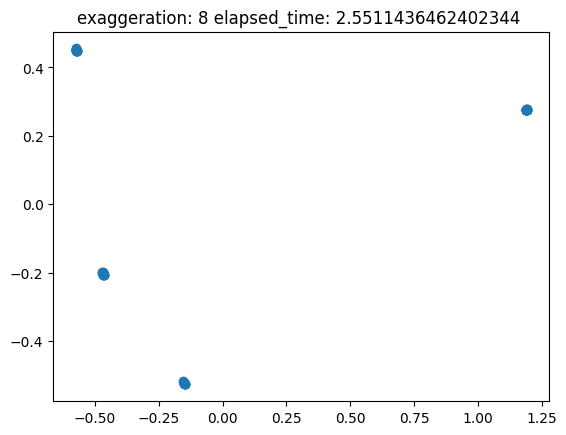

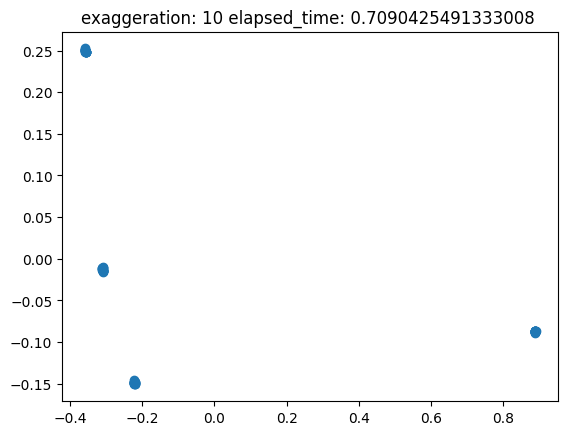

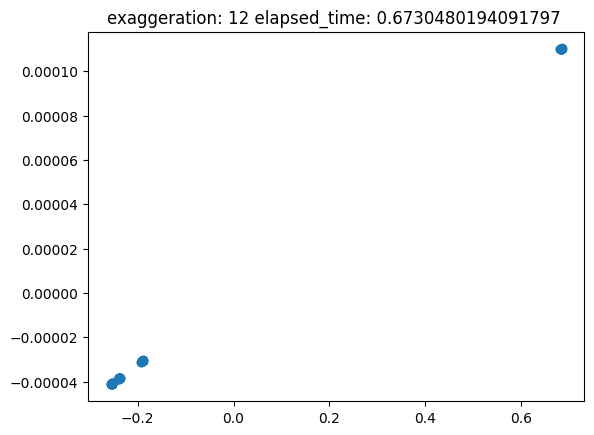

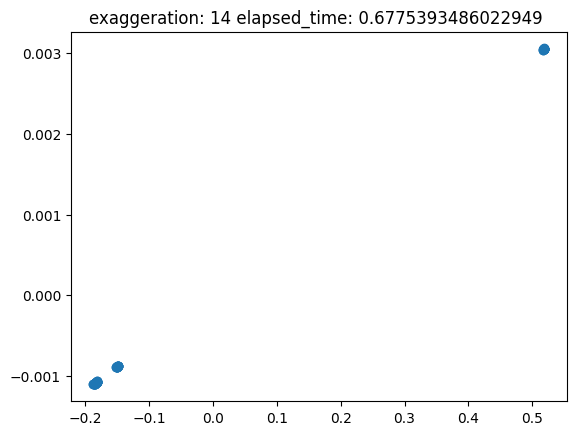

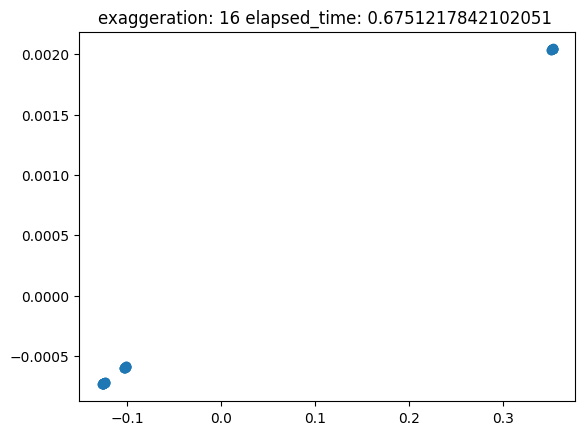

T-sne – exaggeration: 6 – elapsed_time: 1.1745576858520508
T-sne – exaggeration: 8 – elapsed_time: 2.5511436462402344
T-sne – exaggeration: 10 – elapsed_time: 0.7090425491333008
T-sne – exaggeration: 12 – elapsed_time: 0.6730480194091797
T-sne – exaggeration: 14 – elapsed_time: 0.6775393486022949
T-sne – exaggeration: 16 – elapsed_time: 0.6751217842102051
T-sne – exaggeration: 18 – elapsed_time: 0.6682322025299072


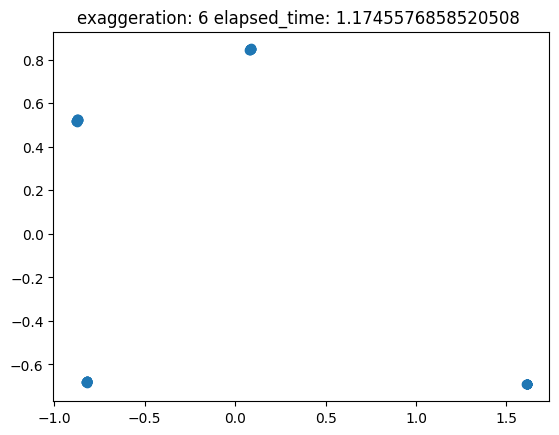

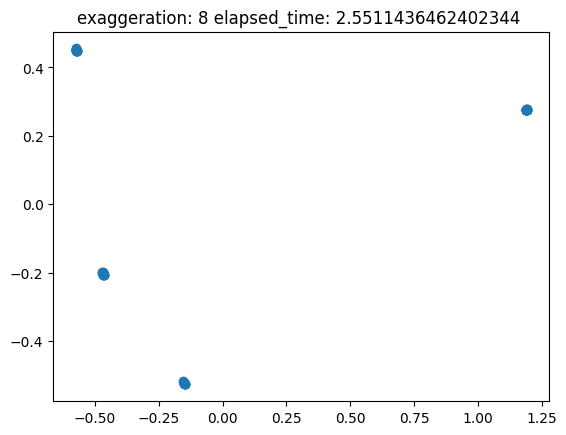

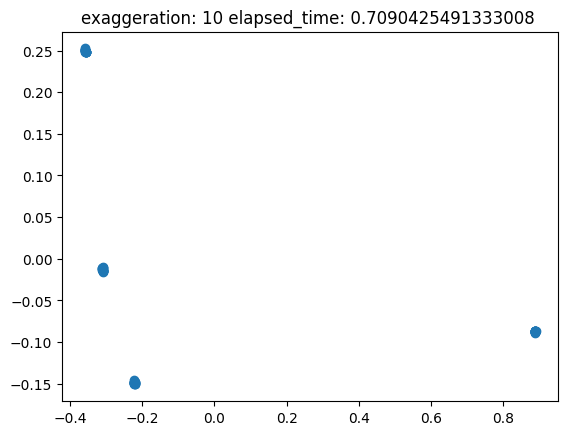

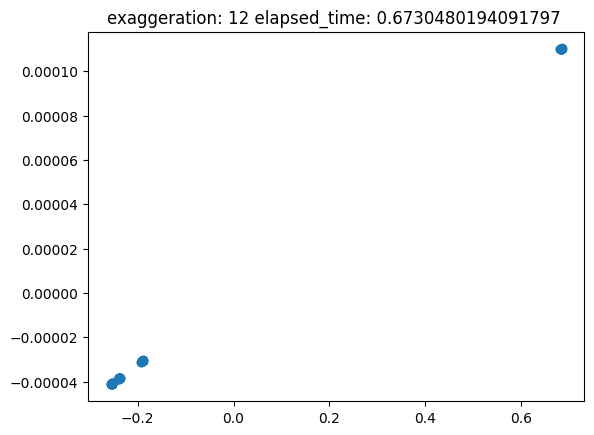

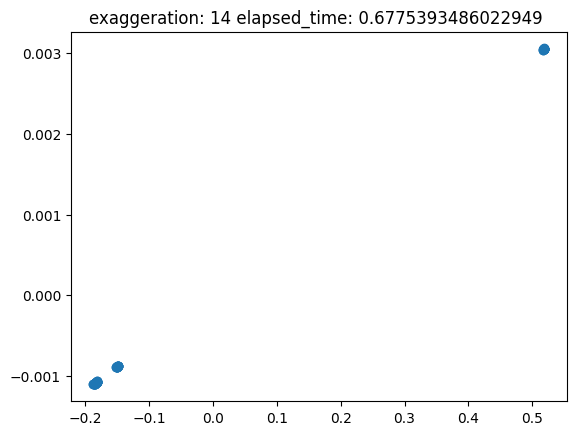

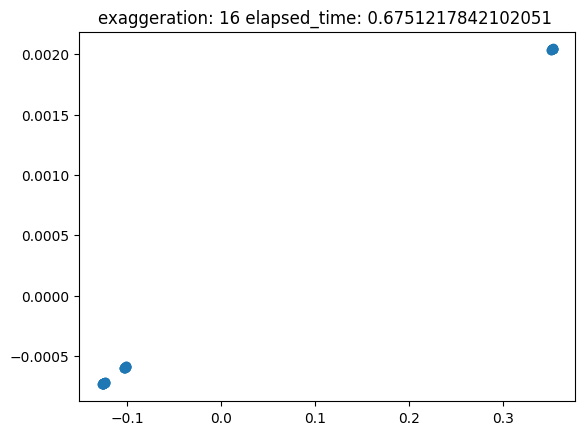

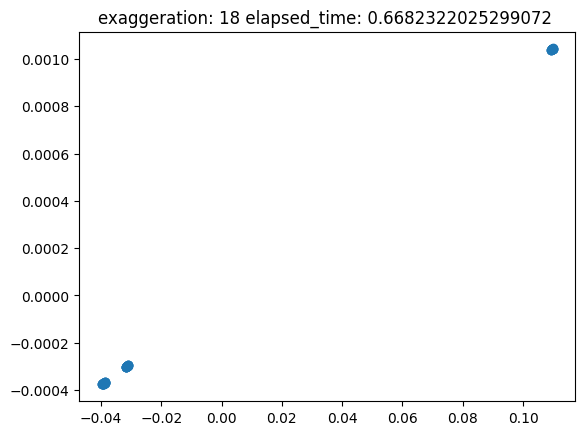

In [ ]:
from openTSNE.sklearn import TSNE as openTSNE
exaggerations = [6, 8, 10, 12, 14, 16, 18 ]
results_with_different_exaggeration= []
elapsed_time_different_exaggeration_secs = []

for e in exaggerations:
  start_time = time.time()

  tsne = openTSNE(
                    perplexity=19.67,
                    exaggeration=e,
                    random_state=42
                )
  reduced_data = tsne.fit_transform(data)
  elapsed_time = time.time() - start_time
  elapsed_time_different_exaggeration_secs.append(elapsed_time)
  results_with_different_exaggeration.append(reduced_data)



  for i, j in zip(exaggerations, elapsed_time_different_exaggeration_secs):
    print(f'T-sne – exaggeration: {i} – elapsed_time: {j}')



  for i in range(len(elapsed_time_different_exaggeration_secs)):
    plt.title(f'exaggeration: {exaggerations[i]} elapsed_time: {elapsed_time_different_exaggeration_secs[i]} ')
    plt.scatter(results_with_different_exaggeration[i][:, 0], results_with_different_exaggeration[i][:, 1])
    plt.show()

# initialization

Параметр определяет начальные координаты точек в низкоразмерном пространстве перед оптимизацией


Использование инициализации PCA обеспечивает более качественный старт и обычно быстрее сходится, чем случайная инициализация.


  0%|          | 0/2 [00:00<?, ?it/s]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.001s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.084557
[t-SNE] KL divergence after 1000 iterations: 0.002275
--------------------------
      tsne1     tsne2
0 -1.237056 -0.254584
1 -0.357685 -4.037081
2  1.205566  0.871759
3  1.165848  0.867888
4  2.145114 -1.340159
--------------------------


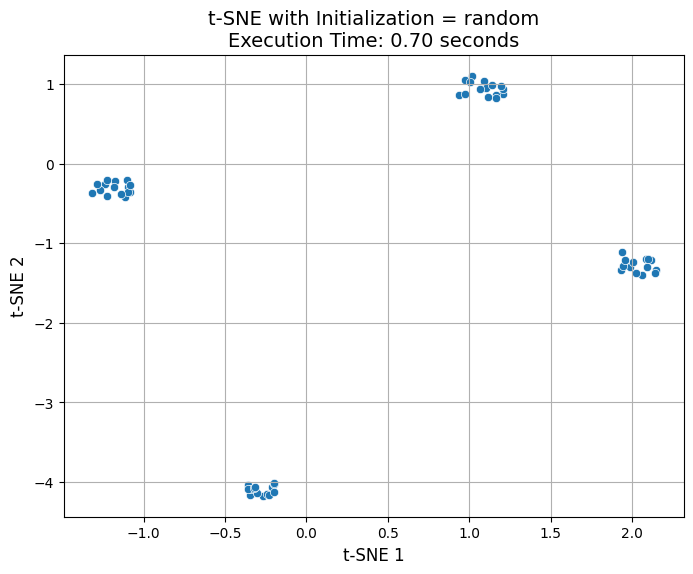

 50%|█████     | 1/2 [00:01<00:01,  1.08s/it]

[t-SNE] Computing 59 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 39.952935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.317284
[t-SNE] KL divergence after 800 iterations: 0.008426
--------------------------
      tsne1     tsne2
0  0.231027 -0.031839
1 -2.312907 -2.991436
2  1.555378 -2.597023
3  1.509968 -2.574738
4  3.218551 -0.916622
--------------------------


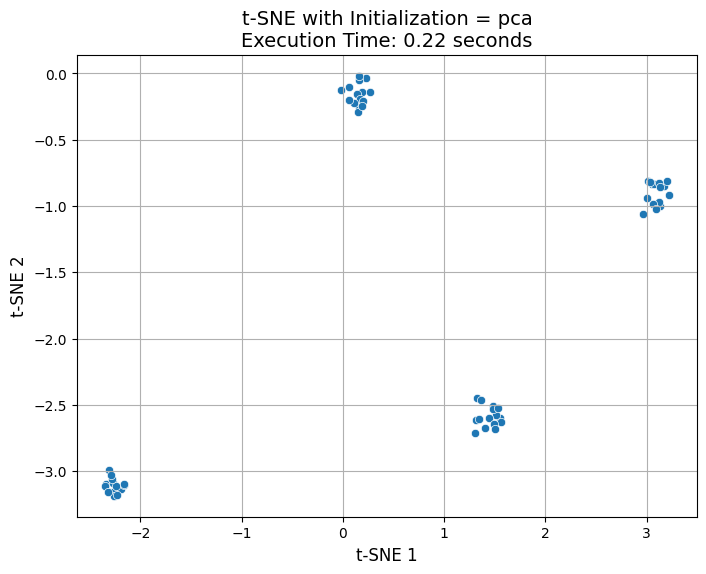

100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


In [ ]:
initializations = ['random', 'pca']
for init in tqdm(initializations):  # Итерируемся по разным способам инициализации
    start_time = time.time()  # Начало отсчета времени

    tsne = TSNE(
        n_components=2,
        perplexity=30,  # Фиксированное значение perplexity
        init=init,  # Задаем инициализацию
        metric="euclidean",
        n_jobs=-1,  # Используйте -1 для всех доступных ядер
        random_state=42,
        verbose=1  # Для подробного вывода
    )

    # Применение t-SNE
    X_tsne = tsne.fit_transform(X)

    # Преобразуем результат в DataFrame
    X_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])

    elapsed_time = time.time() - start_time  # Время выполнения

    print('--------------------------')
    print(X_tsne.head())
    print('--------------------------')

    # Визуализация результатов
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='tsne1', y='tsne2', data=X_tsne)
    plt.title(f't-SNE with Initialization = {init}\nExecution Time: {elapsed_time:.2f} seconds', fontsize=14)
    plt.xlabel('t-SNE 1', fontsize=12)
    plt.ylabel('t-SNE 2', fontsize=12)
    plt.grid(True)
    plt.show()

# dof


Значения ниже 1 придают больше веса локальным структурам, что может быть полезно для данных с плотными кластерами.

  0%|          | 0/4 [00:00<?, ?it/s]WARNING:openTSNE.affinity:Perplexity value 30 is too high. Using perplexity 19.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, random_state=42, verbose=1)
--------------------------------------------------------------------------------
===> Finding 59 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=5.00 for 250 iterations...
Iteration   50, KL divergence 0.8846, 50 iterations in 0.2432 sec
Iteration  100, KL divergence 0.9144, 50 iterations in 0.2587 sec
Iteration  150, KL divergence 0.9095, 50 iterations in 0.2580 sec
Iteration  200, KL divergence 0.9143, 50 iterations in 0.2746 sec
Iteration  250, KL divergence 0.9152, 50 iterations in 0.2321 sec
   --> Time elapsed: 1.27 seconds
===> Running optimization with exaggeration=1.00, lr=60.00 for

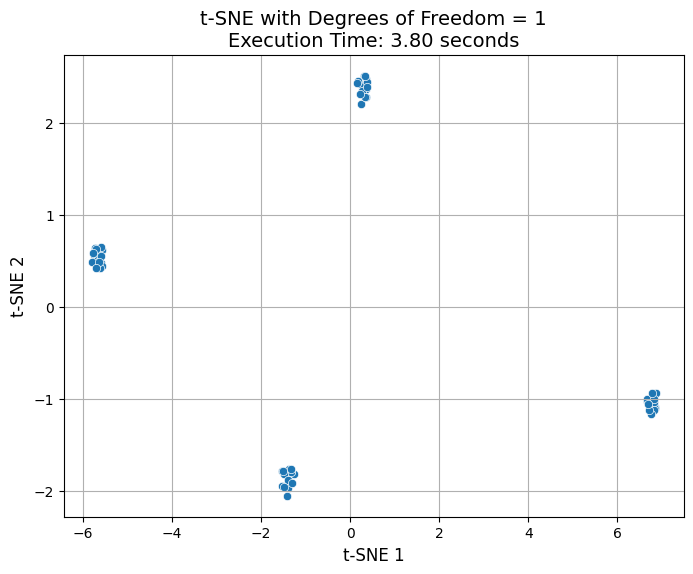

 25%|██▌       | 1/4 [00:04<00:12,  4.03s/it]WARNING:openTSNE.affinity:Perplexity value 30 is too high. Using perplexity 19.67 instead


--------------------------------------------------------------------------------
TSNE(dof=2, early_exaggeration=12, n_jobs=-1, random_state=42, verbose=1)
--------------------------------------------------------------------------------
===> Finding 59 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=5.00 for 250 iterations...
Iteration   50, KL divergence 0.8831, 50 iterations in 1.2956 sec
Iteration  100, KL divergence 0.9145, 50 iterations in 1.3767 sec
Iteration  150, KL divergence 0.9136, 50 iterations in 0.6376 sec
Iteration  200, KL divergence 0.9139, 50 iterations in 1.0642 sec
Iteration  250, KL divergence 0.9141, 50 iterations in 1.0321 sec
   --> Time elapsed: 5.42 seconds
===> Running optimization with exaggeration=1.00, lr=60

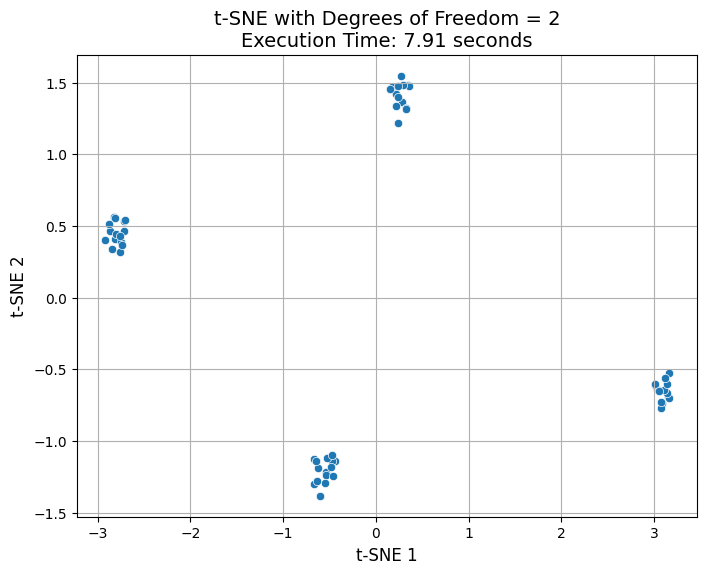

 50%|█████     | 2/4 [00:12<00:12,  6.46s/it]WARNING:openTSNE.affinity:Perplexity value 30 is too high. Using perplexity 19.67 instead


--------------------------------------------------------------------------------
TSNE(dof=3, early_exaggeration=12, n_jobs=-1, random_state=42, verbose=1)
--------------------------------------------------------------------------------
===> Finding 59 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=5.00 for 250 iterations...
Iteration   50, KL divergence 0.8936, 50 iterations in 0.2581 sec
Iteration  100, KL divergence 0.9133, 50 iterations in 0.2804 sec
Iteration  150, KL divergence 0.9148, 50 iterations in 0.2669 sec
Iteration  200, KL divergence 0.9136, 50 iterations in 0.2446 sec
Iteration  250, KL divergence 0.9145, 50 iterations in 0.2866 sec
   --> Time elapsed: 1.34 seconds
===> Running optimization with exaggeration=1.00, lr=60

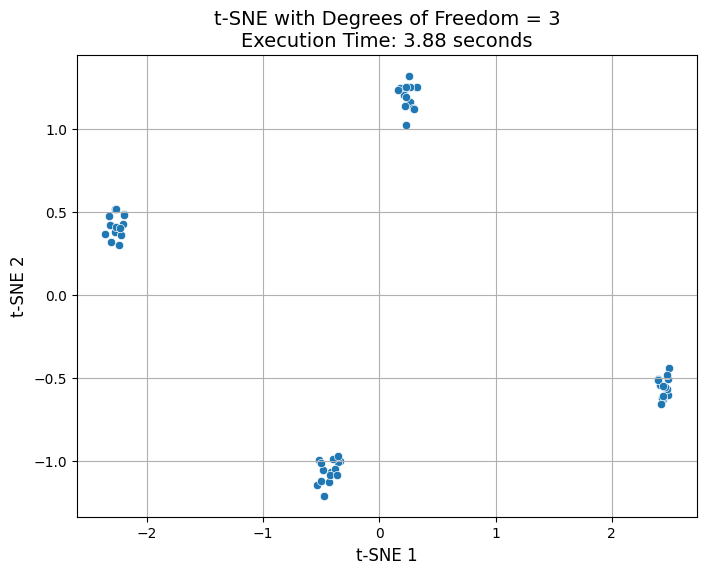

 75%|███████▌  | 3/4 [00:16<00:05,  5.39s/it]WARNING:openTSNE.affinity:Perplexity value 30 is too high. Using perplexity 19.67 instead


--------------------------------------------------------------------------------
TSNE(dof=4, early_exaggeration=12, n_jobs=-1, random_state=42, verbose=1)
--------------------------------------------------------------------------------
===> Finding 59 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=5.00 for 250 iterations...
Iteration   50, KL divergence 0.9002, 50 iterations in 0.2581 sec
Iteration  100, KL divergence 0.9106, 50 iterations in 0.8279 sec
Iteration  150, KL divergence 0.9138, 50 iterations in 1.4156 sec
Iteration  200, KL divergence 0.9145, 50 iterations in 0.7954 sec
Iteration  250, KL divergence 0.9145, 50 iterations in 0.2673 sec
   --> Time elapsed: 3.57 seconds
===> Running optimization with exaggeration=1.00, lr=60

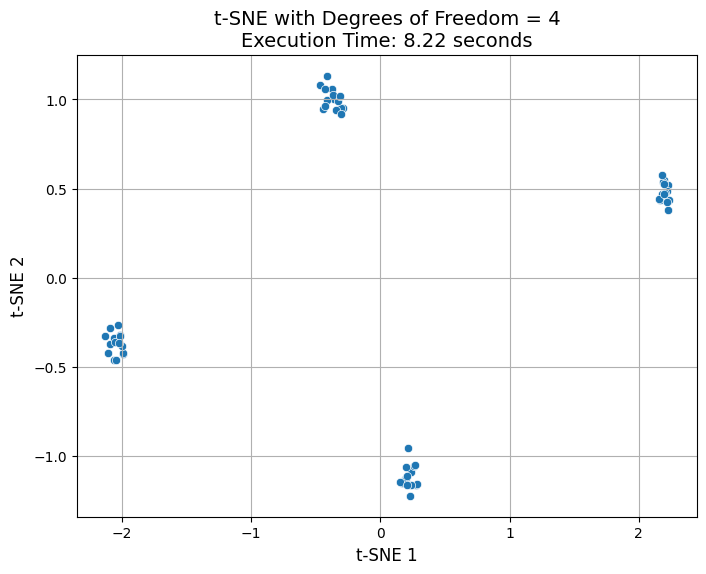

100%|██████████| 4/4 [00:24<00:00,  6.19s/it]


In [ ]:
dofs = [1, 2, 3, 4]  # Пример значений degrees of freedom, можно увеличивать по необходимости

for dof in tqdm(dofs):  # Итерируемся по разным значениям dof
    start_time = time.time()  # Начало отсчета времени

    # Создаем экземпляр OpenTSNE с текущим значением dof
    tsne = openTSNE(
        n_components=2,
        perplexity=30,  # Фиксированное значение perplexity
        early_exaggeration=12,  # Используем фиксированное значение
        metric="euclidean",
        n_jobs=-1,  # Используйте -1 для всех доступных ядер
        random_state=42,
        verbose=1,  # Для подробного вывода
        dof=dof  # Устанавливаем текущее значение degrees of freedom
    )

    # Применение t-SNE
    X_tsne = tsne.fit_transform(X)  # Метод fit используется для установки координат

    # Преобразуем результат в DataFrame
    X_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])

    elapsed_time = time.time() - start_time  # Время выполнения

    print('--------------------------')
    print(X_tsne.head())
    print('--------------------------')

    # Визуализация результатов
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='tsne1', y='tsne2', data=X_tsne)
    plt.title(f't-SNE with Degrees of Freedom = {dof}\nExecution Time: {elapsed_time:.2f} seconds', fontsize=14)
    plt.xlabel('t-SNE 1', fontsize=12)
    plt.ylabel('t-SNE 2', fontsize=12)
    plt.grid(True)
    plt.show()

# Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train Images Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000, 1)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


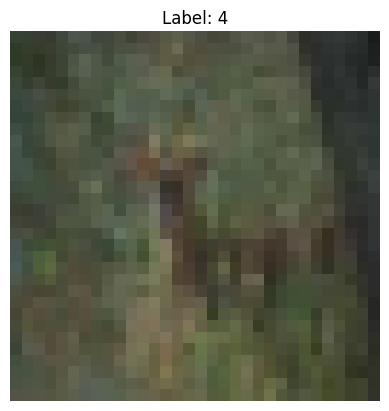

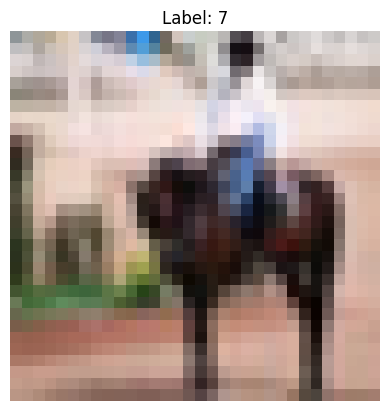

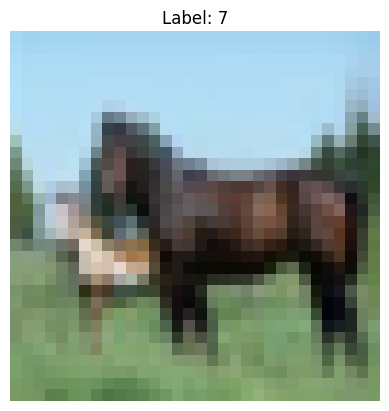

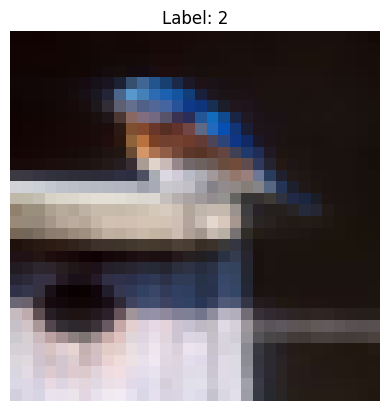

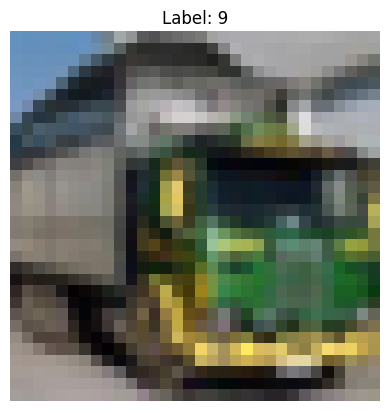

In [ ]:
from tensorflow.keras.datasets import cifar10

def load_cifar10_dataset():
    """
    Загружает набор данных CIFAR-10.
    Набор включает изображения различных объектов (например, самолеты, автомобили, птицы и т.д.).
    """
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
    return train_images, train_labels, test_images, test_labels

# Загрузка данных
train_images, train_labels, test_images, test_labels = load_cifar10_dataset()

# Просмотр размеров загруженных данных
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

# Просмотр первых 5 изображений
import matplotlib.pyplot as plt

for i in range(10, 15):
    plt.imshow(train_images[i])
    plt.title(f'Label: {train_labels[i][0]}')
    plt.axis('off')
    plt.show()

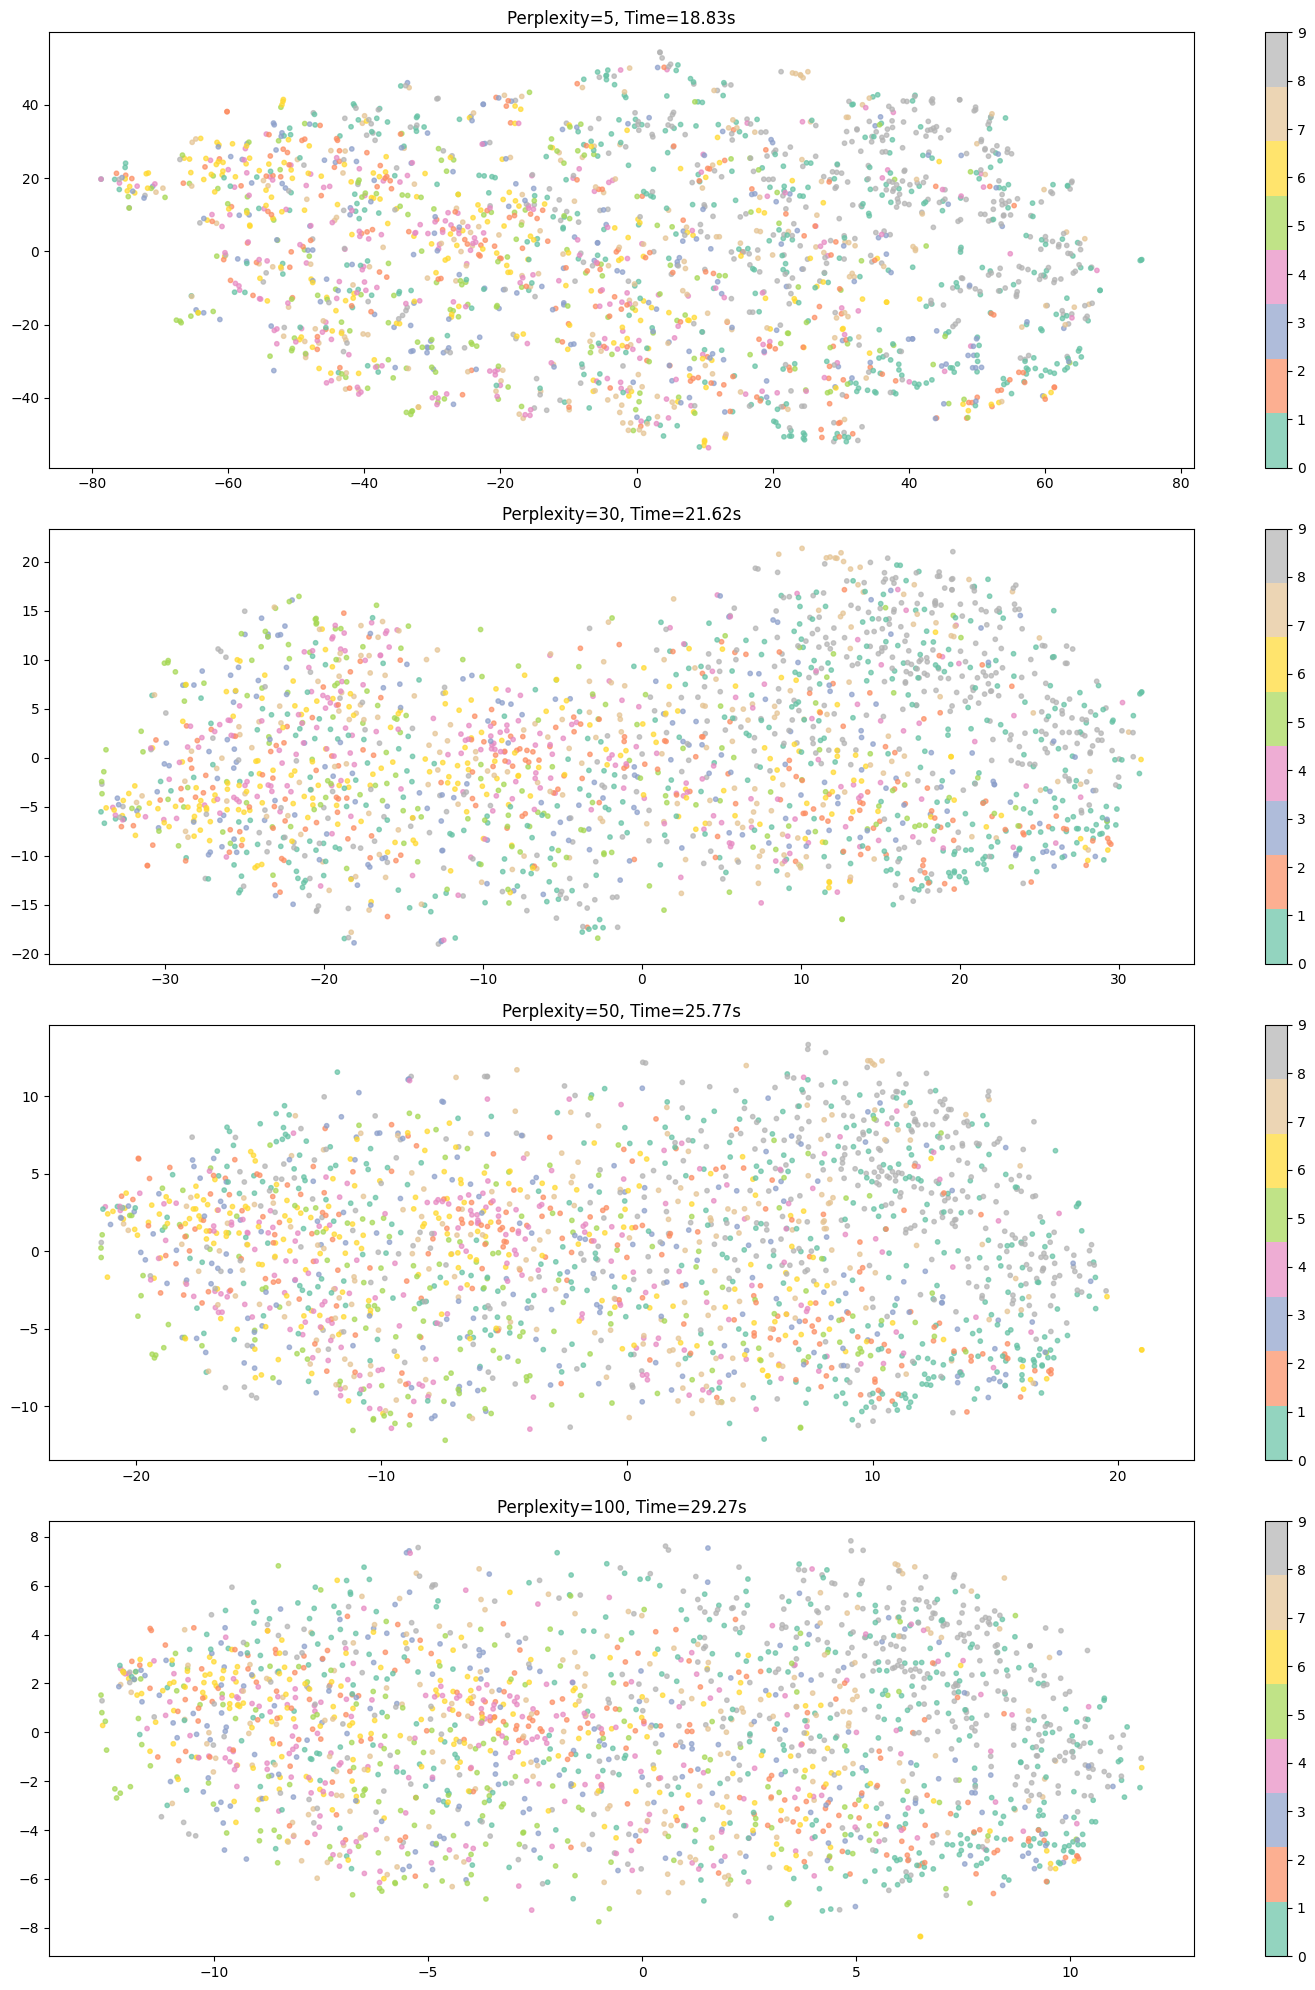

Перплексия 5: 18.83 секунд
Перплексия 30: 21.62 секунд
Перплексия 50: 25.77 секунд
Перплексия 100: 29.27 секунд


In [ ]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Эксперимент с перплексией
def experiment_perplexity_large(X, y, perplexities):
    """
    Эксперимент с разными значениями перплексии для большого датасета.
    """
    plt.figure(figsize=(15, len(perplexities) * 5))

    times = []

    for i, perplexity in enumerate(perplexities):
        start_time = time.time()

        tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, random_state=42)
        Y = tsne.fit_transform(X)  # Здесь происходит применение t-SNE

        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

        plt.subplot(len(perplexities), 1, i + 1)
        # Используем cmap='Set2' вместо 'tab8' или 'tab10'
        scatter = plt.scatter(Y[:, 0], Y[:, 1], c=y.astype(int), cmap='Set2', s=10, alpha=0.7)
        plt.colorbar(scatter)
        plt.title(f"Perplexity={perplexity}, Time={elapsed_time:.2f}s")

    plt.tight_layout()
    plt.show()

    return times

# Эксперимент с перплексией на первых 2000 изображениях из CIFAR-10
perplexities = [5, 30, 50, 100]
times_perplexity = experiment_perplexity_large(train_images_flat[:2000], train_labels[:2000], perplexities)

# Результаты времени
for perplexity, elapsed_time in zip(perplexities, times_perplexity):
    print(f"Перплексия {perplexity}: {elapsed_time:.2f} секунд")
